# Trabajo Final: Caso clientes de Telecomunicaciones

### Juan Diego Diaz Meza

## Requerimientos Previos

In [283]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [284]:
pwd

'c:\\Users\\Juan Diego\\Documents\\ProyectoAnalisisPython'

In [285]:
df=pd.read_csv('telecom_customer_churn.csv',sep = ";",encoding = 'utf8')
df.shape

(7043, 21)

In [286]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: "No", 1 : "Yes"})
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7590-VHVEG
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,5575-GNVDE
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3668-QPYBK
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7795-CFOCW
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,6840-RESVB
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,2234-XADUH
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,4801-JZAZL
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,8361-LTMKD


In [287]:
df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,7590-VHVEG
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,5575-GNVDE
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3668-QPYBK
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,7795-CFOCW
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,6840-RESVB
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,2234-XADUH
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,4801-JZAZL
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,8361-LTMKD



## Exploración de datos

In [288]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,7590-VHVEG
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,5575-GNVDE
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3668-QPYBK
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,7795-CFOCW
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,9237-HQITU


## Búsqueda de Datos Nulos

In [289]:
df.isna().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
customerID           0
dtype: int64

Se observa que solo la variable de  TotalCharges presenta valores nulos

<Axes: >

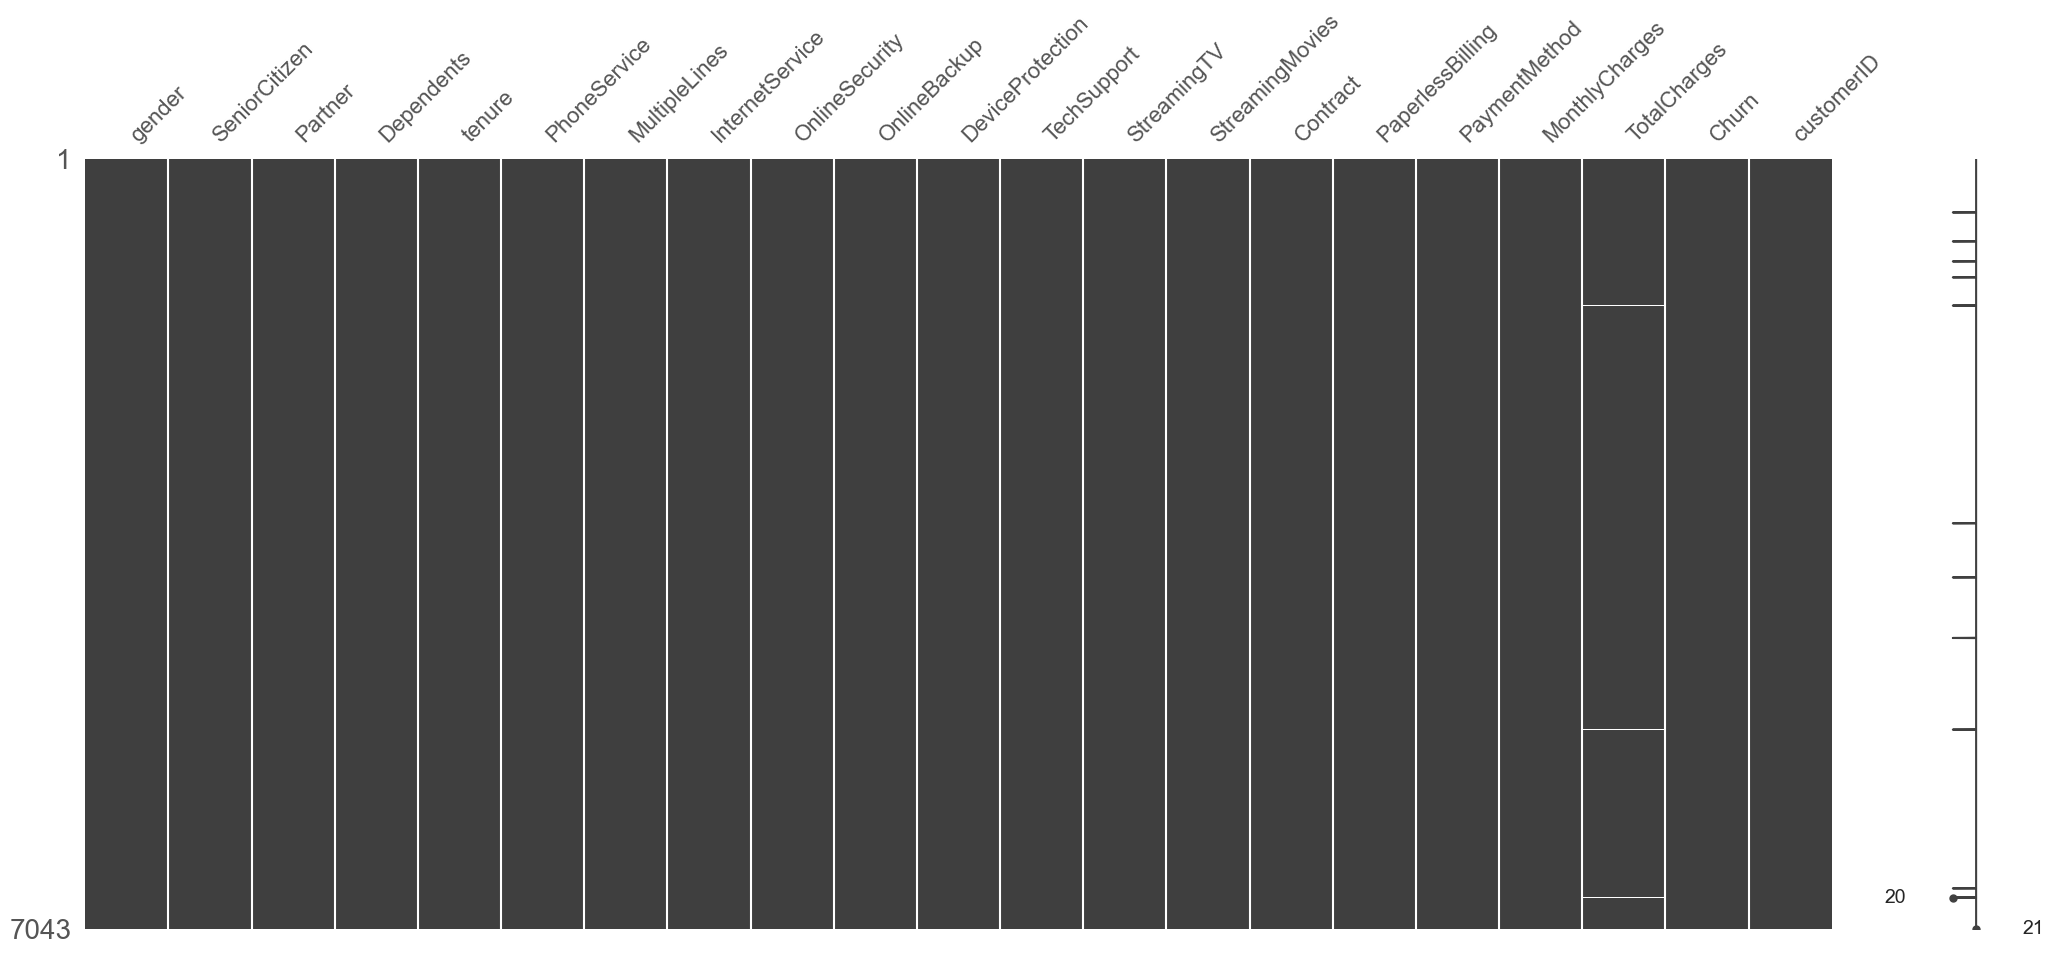

In [290]:
import missingno as msno
msno.matrix(df)


## Variable objetivo (Target)

In [291]:
df.groupby('Churn').size()

Churn
0    5174
1    1869
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

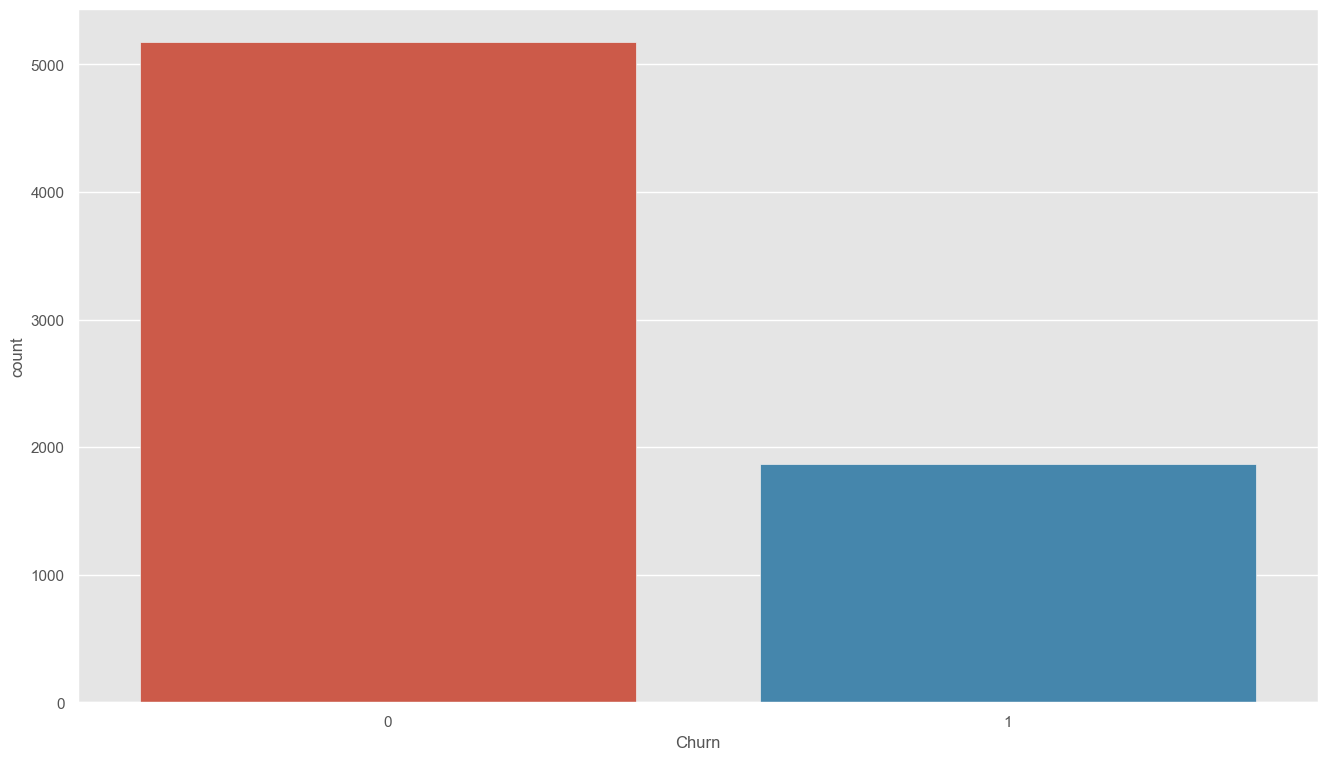

In [292]:
sns.countplot(x='Churn',data=df)

Aproximadamente el 27% de los clientes ha cambiado a otro operador. La data esta ligeramente desbalanceada

## Variables Cuantitativas

In [293]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.265370
std,24.559481,30.090047,2266.771362,0.441561
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


No se evidencian outliners, ya que la media> std

### Histogramas por Variable


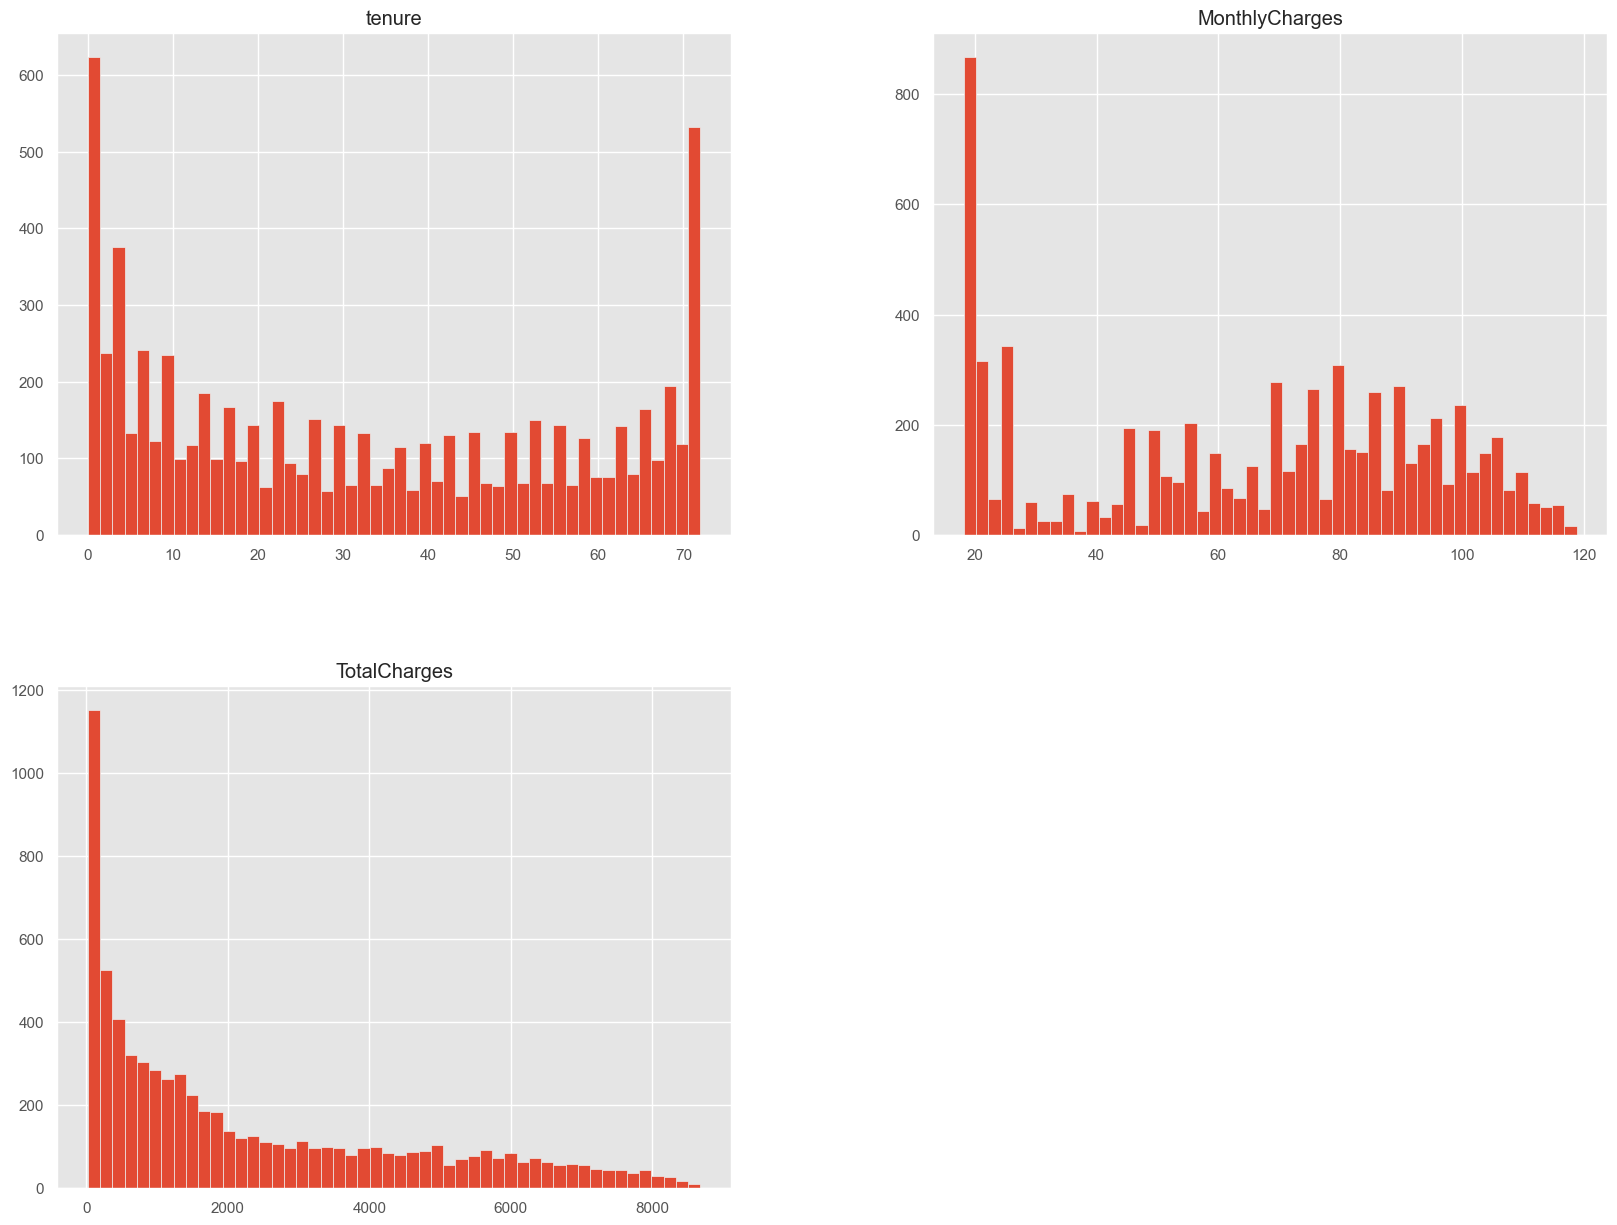

In [294]:
Var=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
df[Var].hist(bins=50 ,figsize=(20,15))
plt.show()

Se evidencia una tendencia para las variables: Tenure y totalcharges. Posiblemente sean variables criticas.


### Cruce de Variables Numéricas

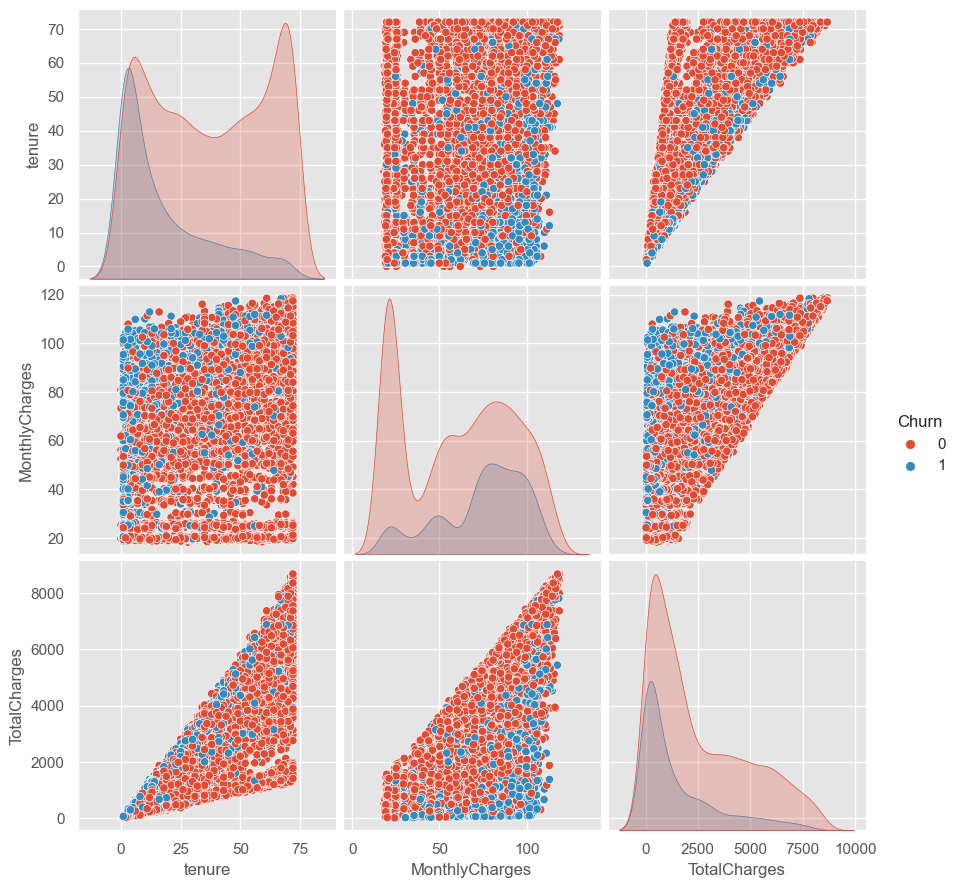

In [295]:
Variables = ['tenure','MonthlyCharges','TotalCharges', 'Churn']
sns.pairplot(df[Variables], height=3, diag_kind = 'kde', hue='Churn')

Del grafico se puede de apreciar que los cargos mensuales y el tenure son variables criticas debido que los valores en los que existen fuga se concentran cuando los clientes tienen menos tiempo con la emprea y más cargos mensuales

### Correlaciones de Variables:

<Axes: >

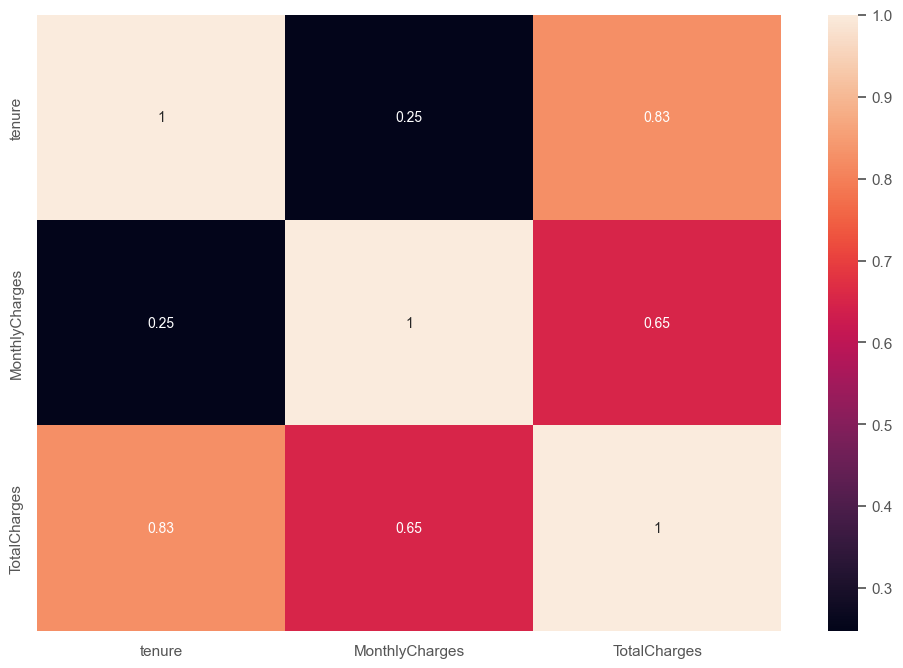

In [296]:
corr = df[['tenure','MonthlyCharges','TotalCharges']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

Si bien exiten correlaciones altas, estas no son considerables porque son esperadas. Es decir, un cliente va a tener más cargos totales cuando mas tiempo tenga como cliente.

In [297]:
categorias = df.select_dtypes(include=['object'])
categorias.dtypes

gender              object
SeniorCitizen       object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
customerID          object
dtype: object

## Variables Cualitativas

### gender

<bound method Series.sort_index of gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64>

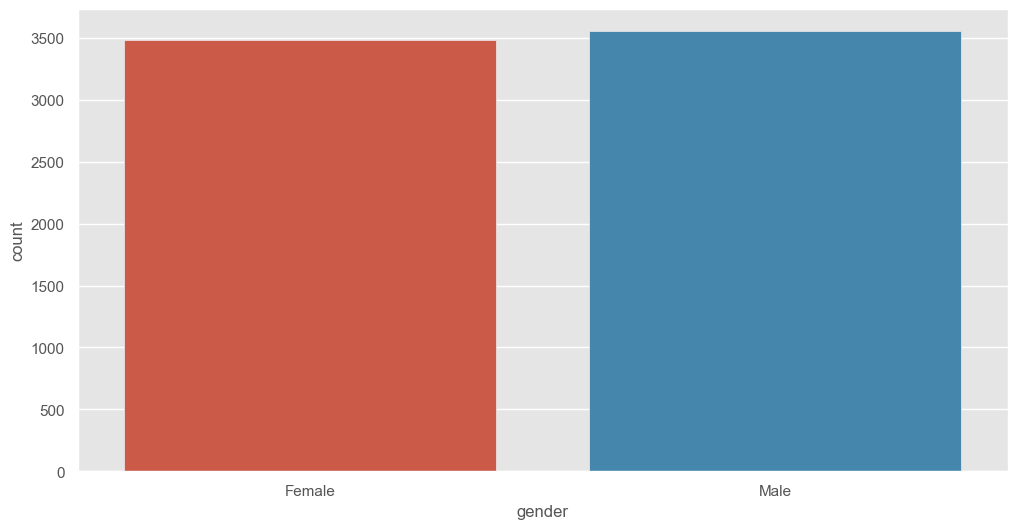

In [298]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = "gender")
df['gender'].value_counts(1).sort_index

Se observa que hay casi un 50-50 de hombres y mujeres

Churn               
       count  sum      mean
gender                     
Female  3488  939  0.269209
Male    3555  930  0.261603

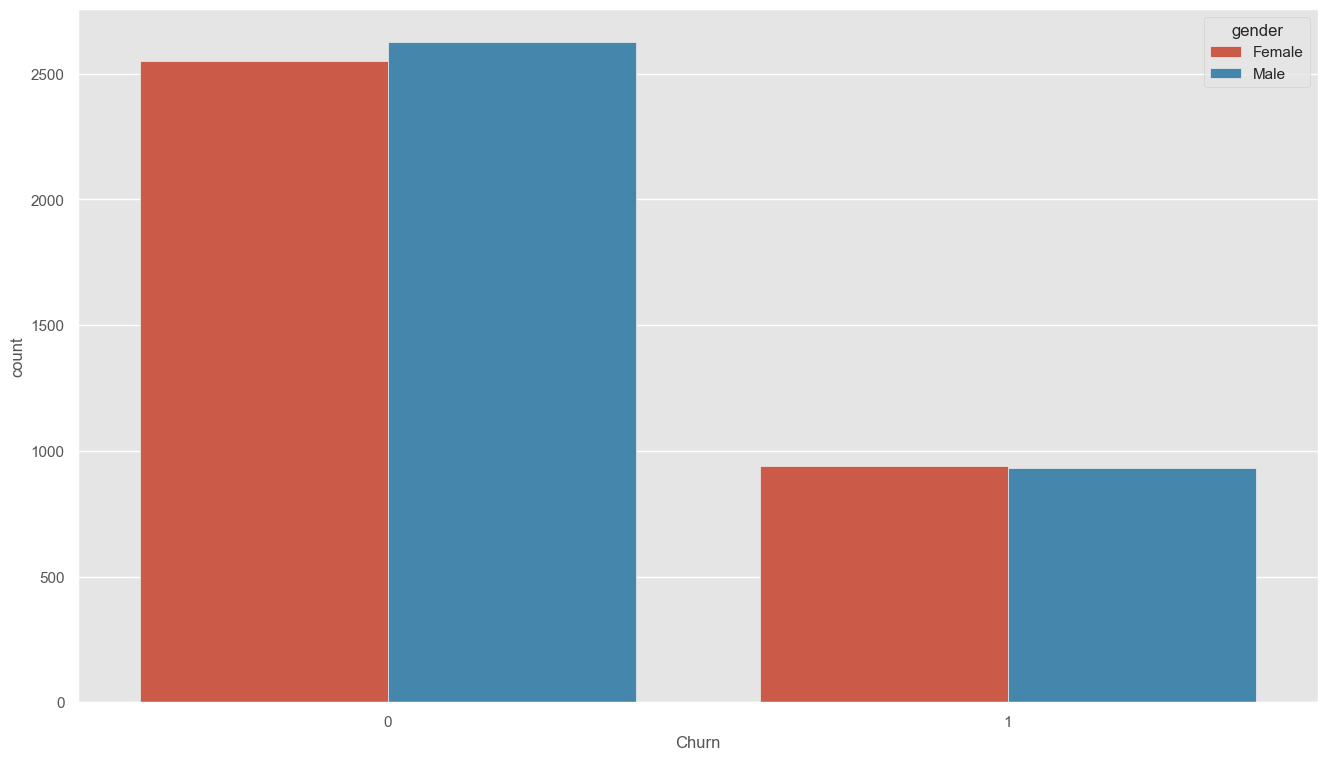

In [299]:
sns.countplot(x='Churn',data=df,hue='gender')
df[['gender', 'Churn']].groupby(['gender'], as_index=False).agg(['count','sum','mean'])

No Existe algun impacto o diferencia en el target.

### Partner

<bound method Series.sort_index of Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64>

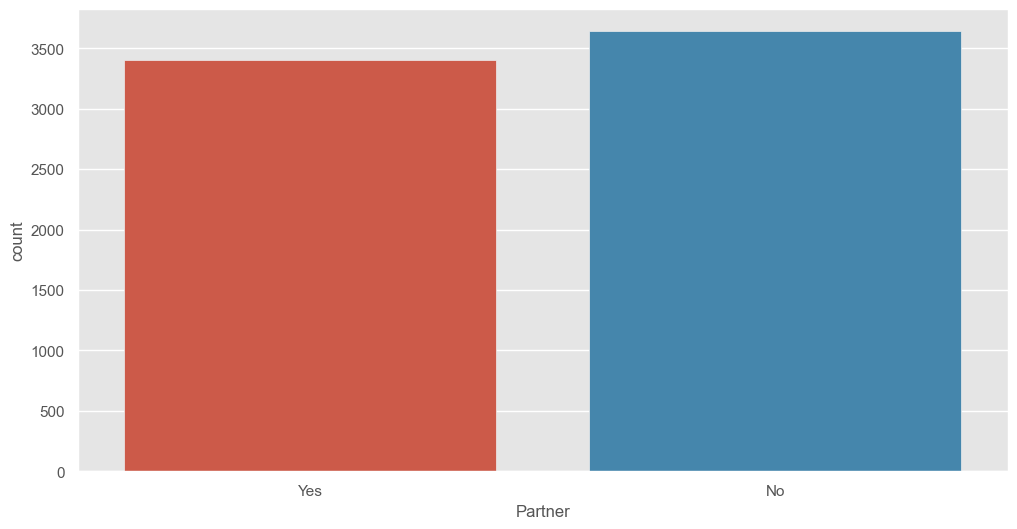

In [300]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = "Partner")
df['Partner'].value_counts(1).sort_index

No existe diferencia significativa en la participacion en la muestra

Churn                
        count   sum      mean
Partner                      
No       3641  1200  0.329580
Yes      3402   669  0.196649

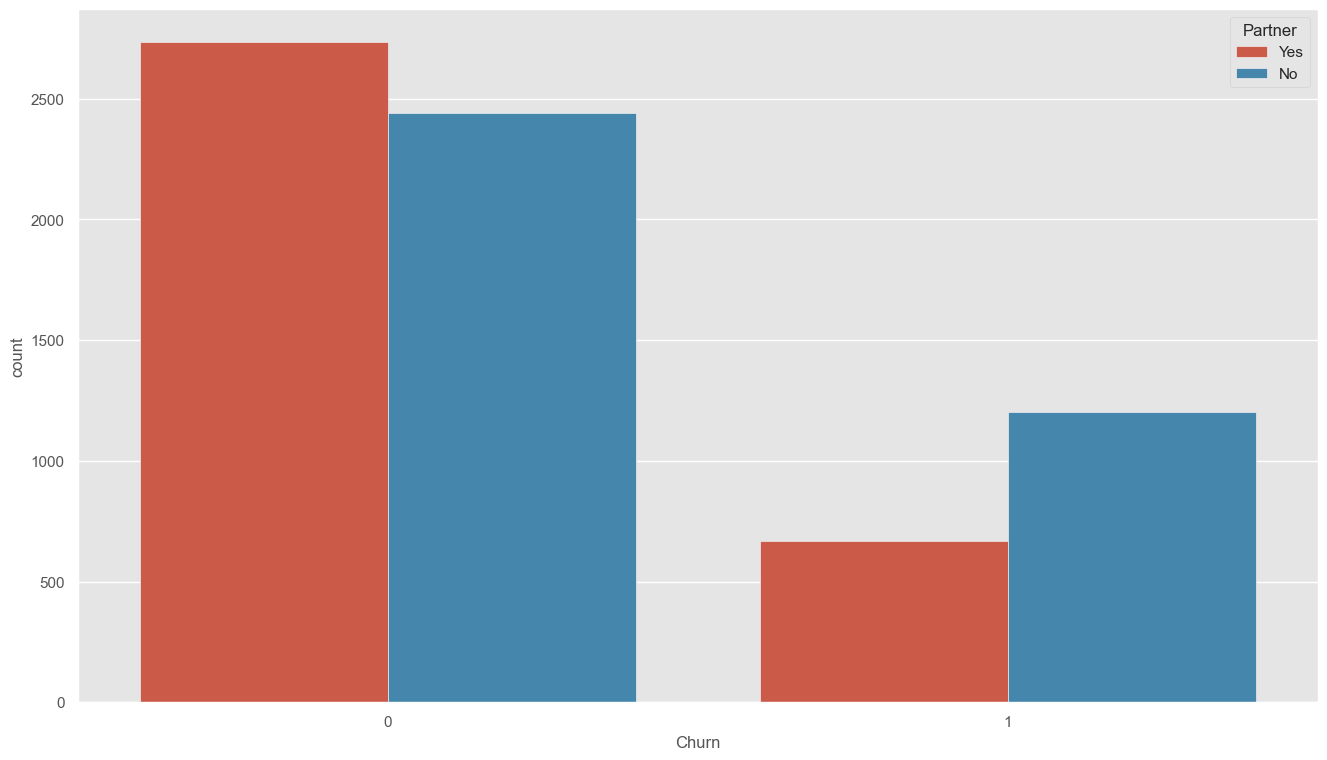

In [301]:
sns.countplot(x='Churn',data=df,hue='Partner')
df[['Partner', 'Churn']].groupby(['Partner'], as_index=False).agg(['count','sum','mean'])

Existe un ligero impacto en el target

### Dependents

<bound method Series.sort_index of Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64>

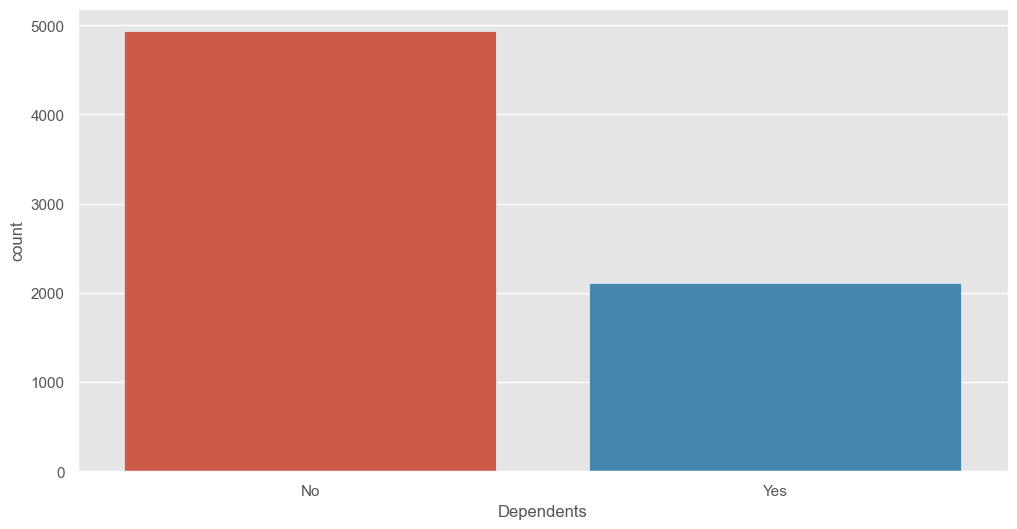

In [302]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'Dependents')
df['Dependents'].value_counts(1).sort_index

Churn                
           count   sum      mean
Dependents                      
No          4933  1543  0.312791
Yes         2110   326  0.154502

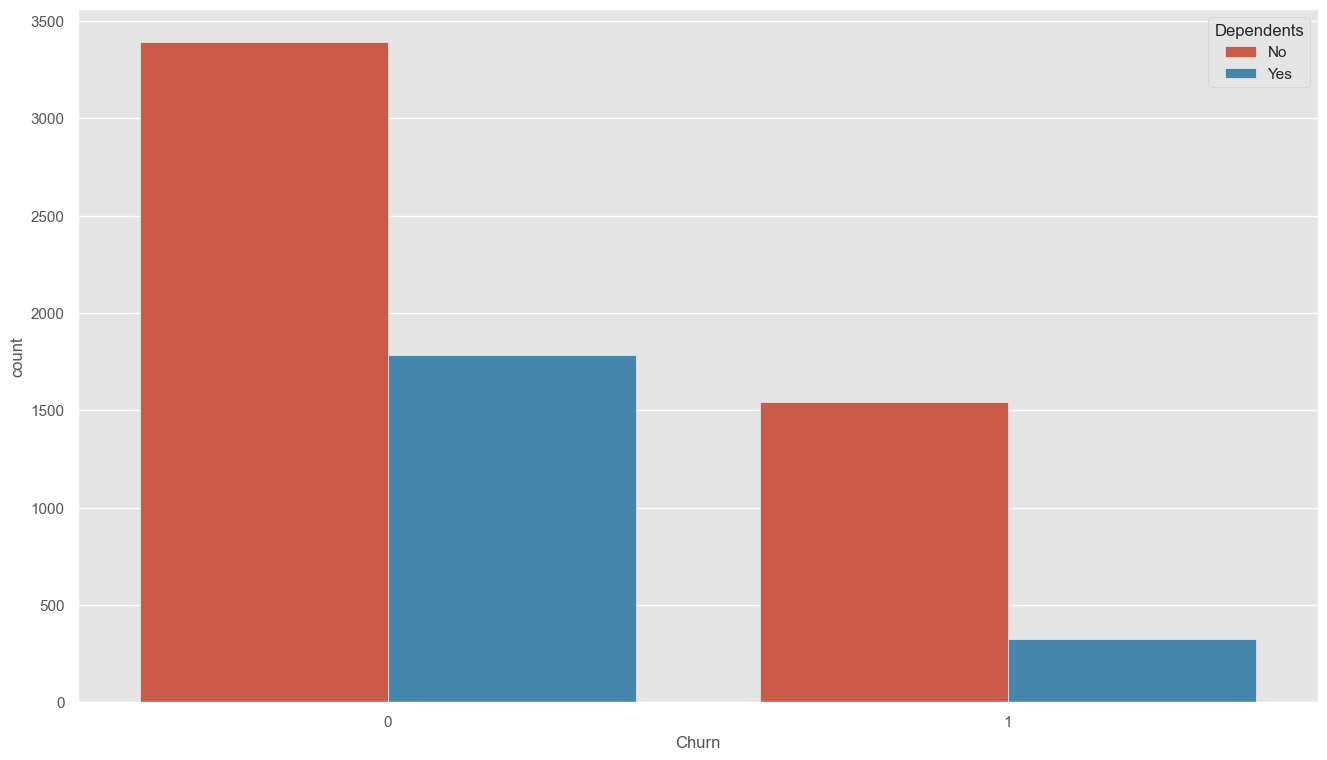

In [303]:
sns.countplot(x='Churn',data=df,hue='Dependents')
df[['Dependents', 'Churn']].groupby(['Dependents'], as_index=False).agg(['count','sum','mean'])

No existe un impacto significativo en el target porque la proporciones en según la variable churn se mantienen

### PhoneService

<bound method Series.sort_index of PhoneService
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64>

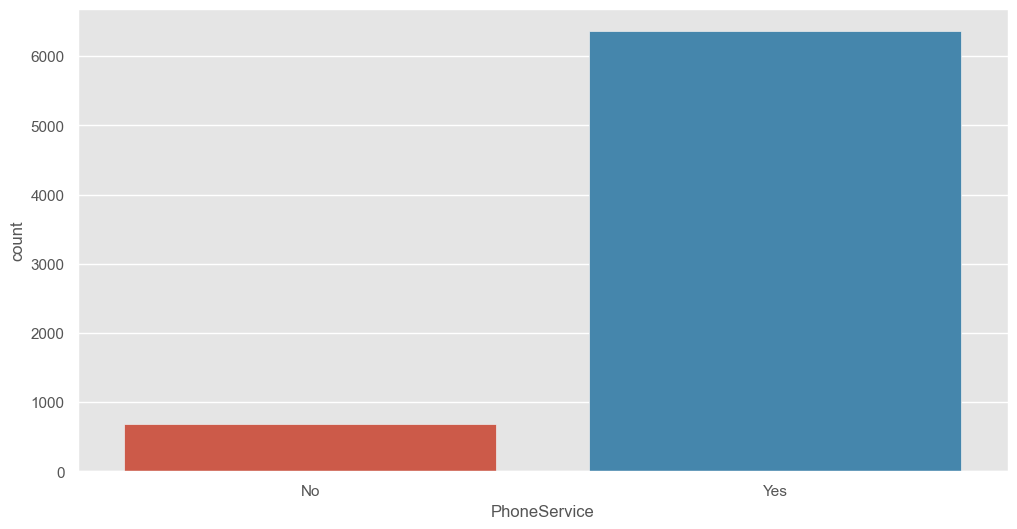

In [304]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'PhoneService')
df['PhoneService'].value_counts(1).sort_index

Existe un desblance significativo

Churn                
             count   sum      mean
PhoneService                      
No             682   170  0.249267
Yes           6361  1699  0.267096

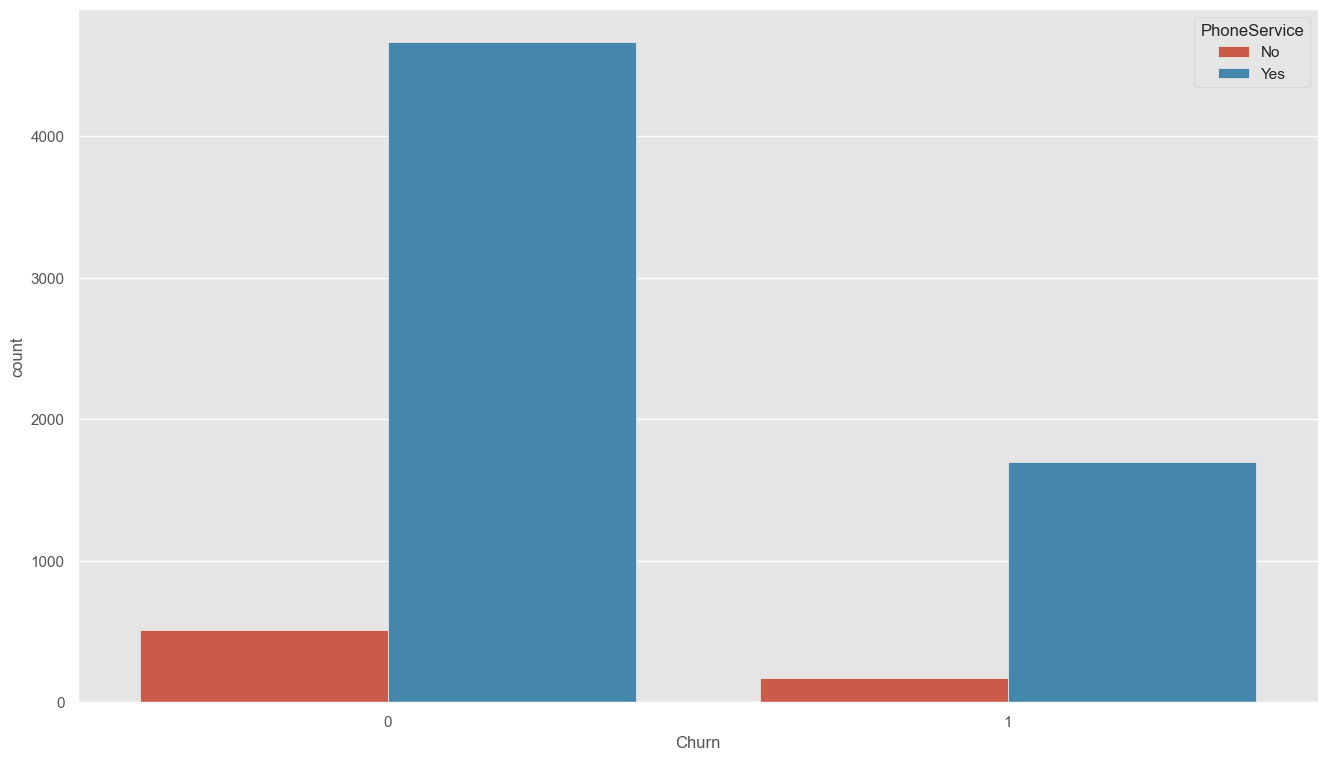

In [305]:
sns.countplot(x='Churn',data=df,hue='PhoneService')
df[['PhoneService', 'Churn']].groupby(['PhoneService'], as_index=False).agg(['count','sum','mean'])

Esta viariable afecta al target

### MultipleLines

<bound method Series.sort_index of MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64>

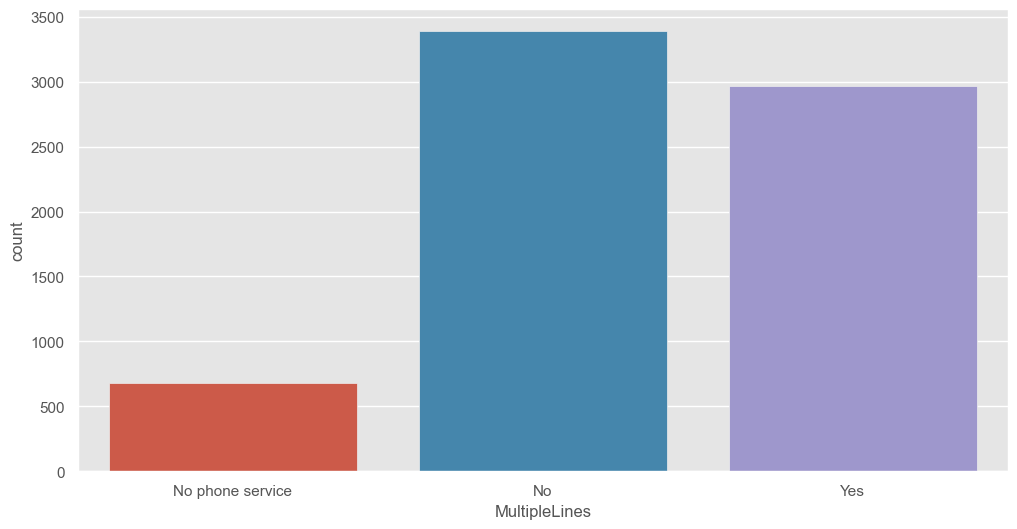

In [306]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'MultipleLines')
df['MultipleLines'].value_counts(1).sort_index

Churn               
                 count  sum      mean
MultipleLines                        
No                3390  849  0.250442
No phone service   682  170  0.249267
Yes               2971  850  0.286099

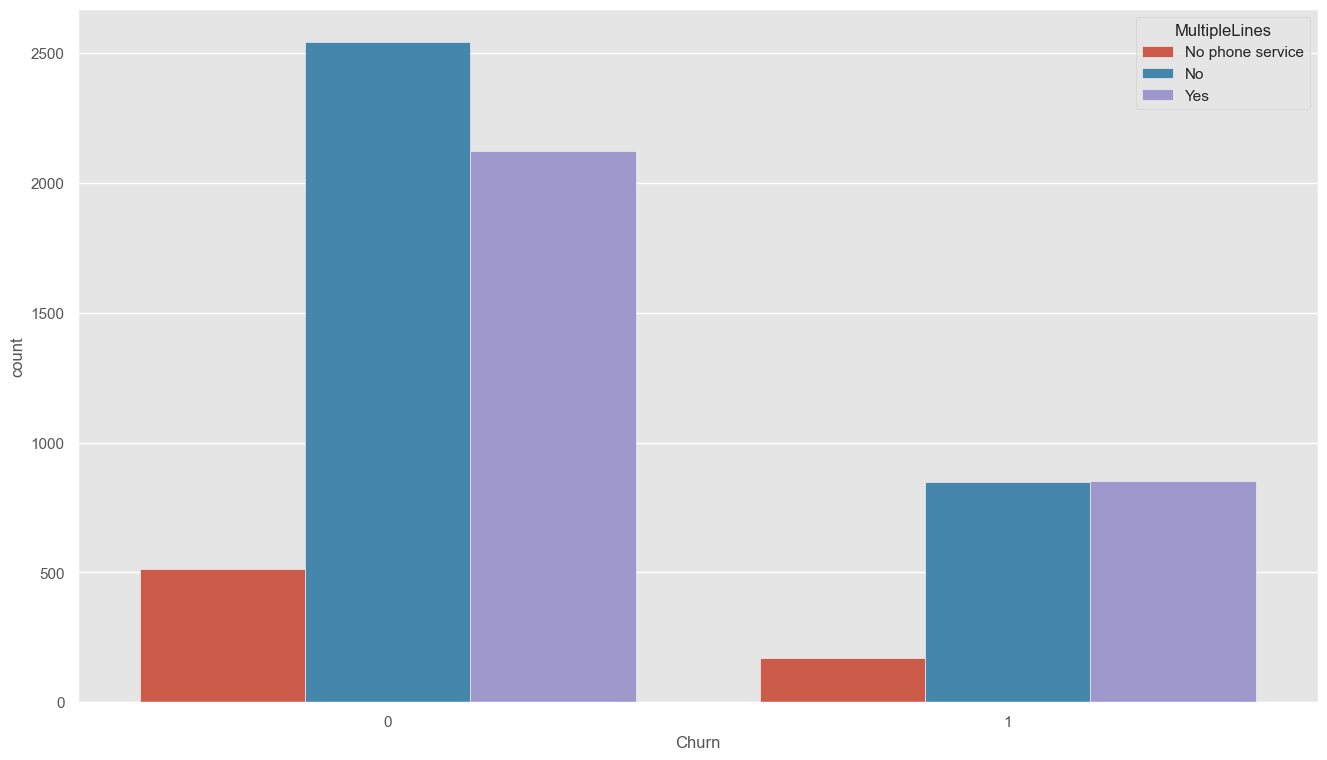

In [307]:
sns.countplot(x='Churn',data=df,hue='MultipleLines')
df[['MultipleLines', 'Churn']].groupby(['MultipleLines'], as_index=False).agg(['count','sum','mean'])

### InternetService

<bound method Series.sort_index of InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64>

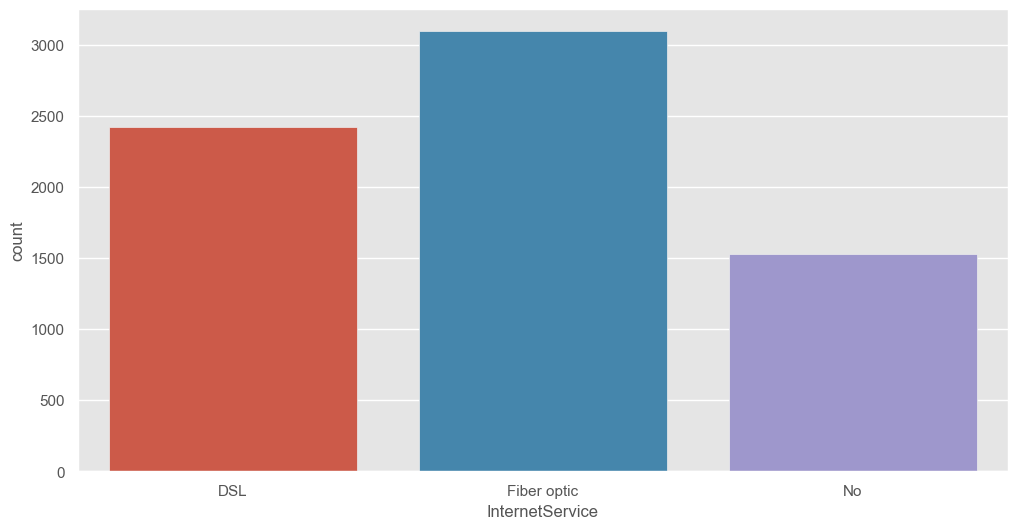

In [308]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'InternetService')
df['InternetService'].value_counts(1).sort_index

Churn                
                count   sum      mean
InternetService                      
DSL              2421   459  0.189591
Fiber optic      3096  1297  0.418928
No               1526   113  0.074050

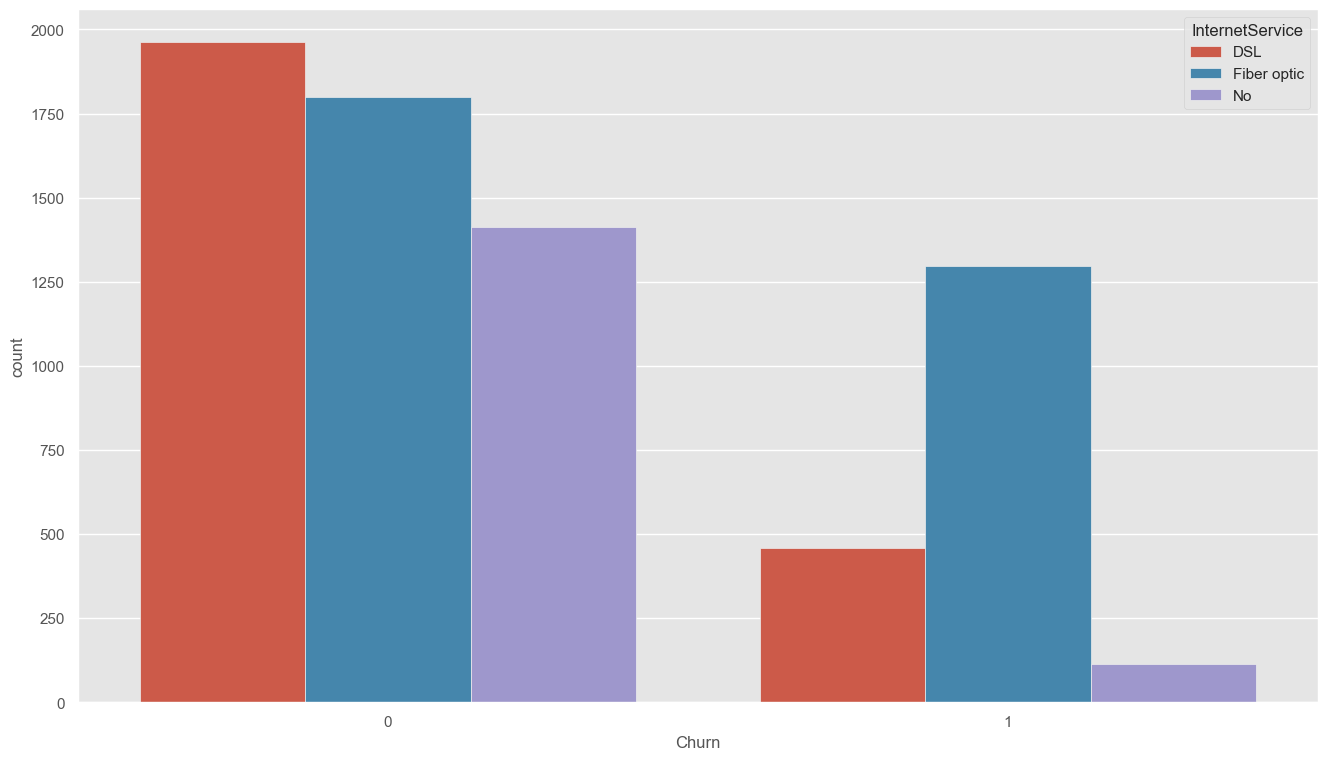

In [309]:
sns.countplot(x='Churn',data=df,hue='InternetService')
df[['InternetService', 'Churn']].groupby(['InternetService'], as_index=False).agg(['count','sum','mean'])

### OnlineSecurity

<bound method Series.sort_index of OnlineSecurity
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: proportion, dtype: float64>

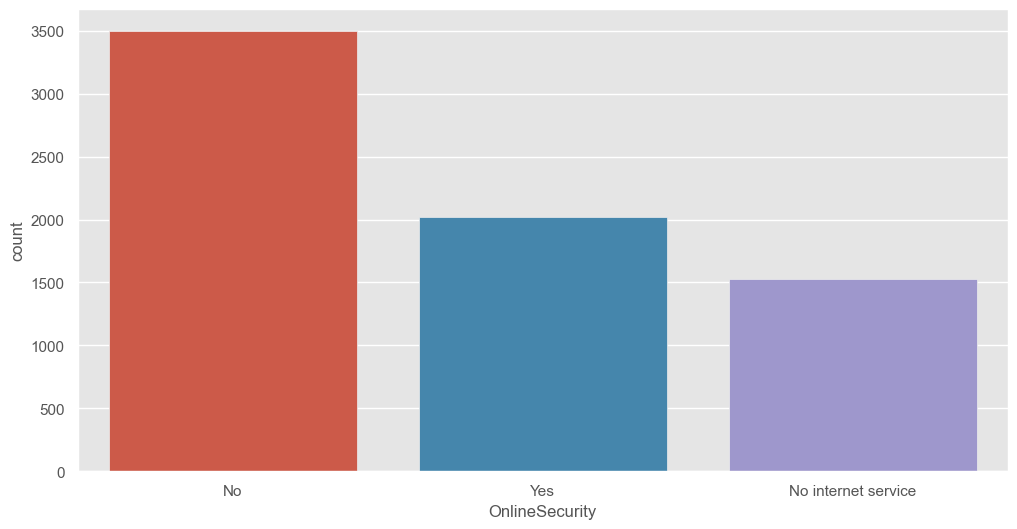

In [310]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'OnlineSecurity')
df['OnlineSecurity'].value_counts(1).sort_index

Churn                
                    count   sum      mean
OnlineSecurity                           
No                   3498  1461  0.417667
No internet service  1526   113  0.074050
Yes                  2019   295  0.146112

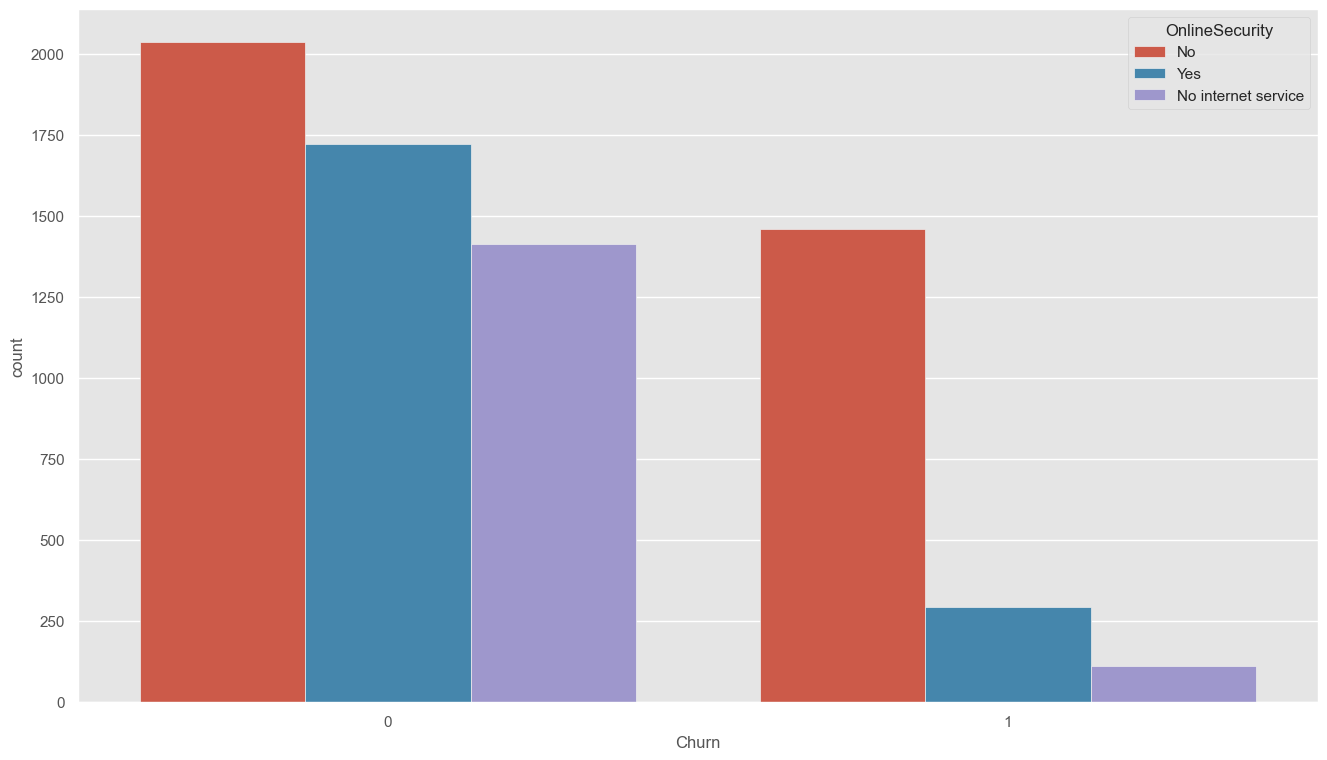

In [311]:
sns.countplot(x='Churn',data=df,hue='OnlineSecurity')
df[['OnlineSecurity', 'Churn']].groupby(['OnlineSecurity'], as_index=False).agg(['count','sum','mean'])

### OnlineBackup

<bound method Series.sort_index of OnlineBackup
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: proportion, dtype: float64>

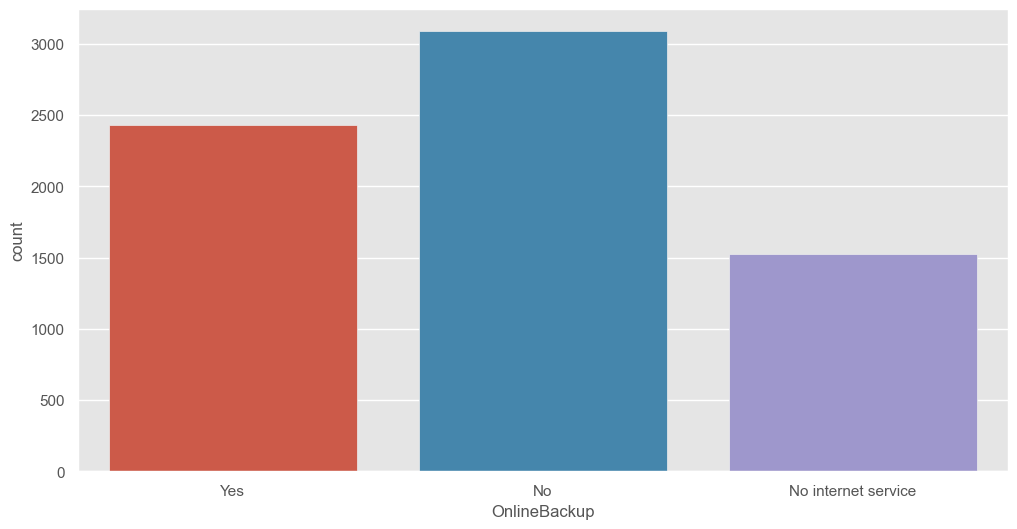

In [312]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'OnlineBackup')
df['OnlineBackup'].value_counts(1).sort_index

Churn                
                    count   sum      mean
OnlineBackup                             
No                   3088  1233  0.399288
No internet service  1526   113  0.074050
Yes                  2429   523  0.215315

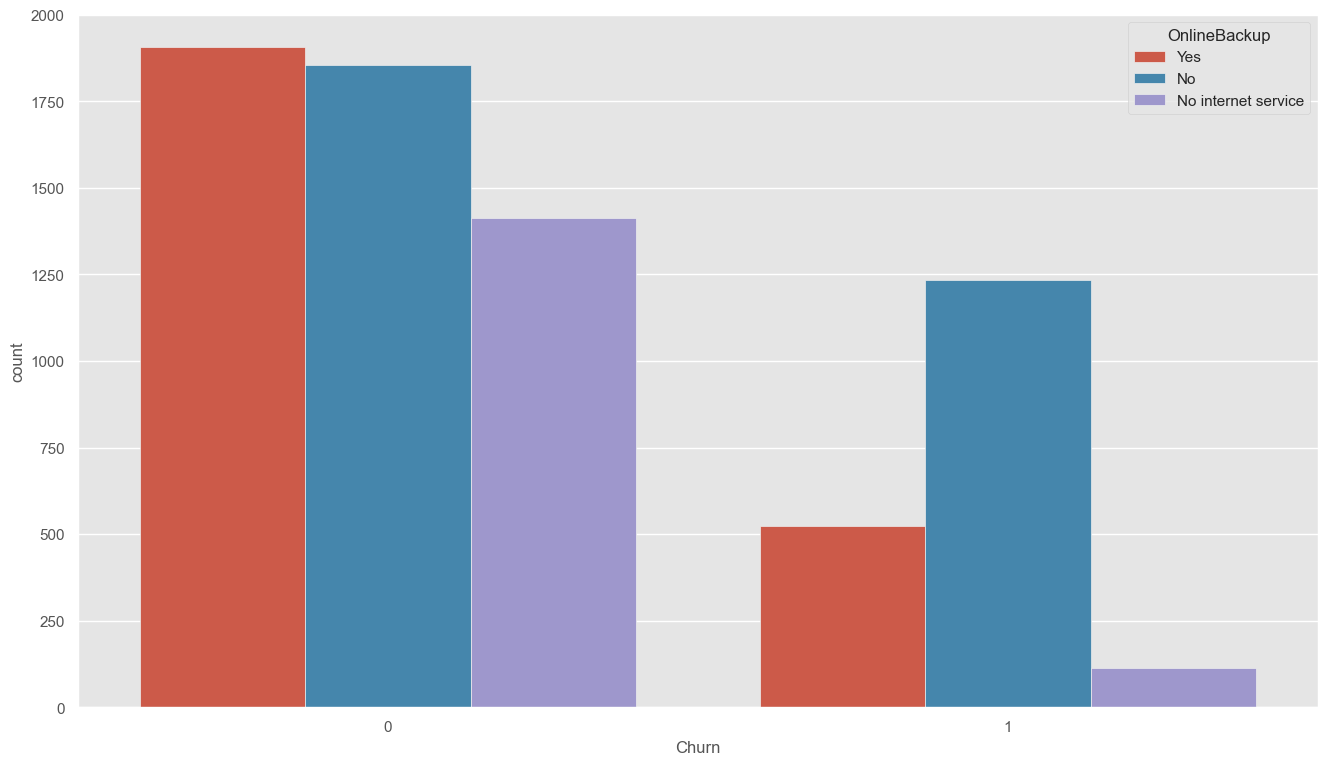

In [313]:
sns.countplot(x='Churn',data=df,hue='OnlineBackup')
df[['OnlineBackup', 'Churn']].groupby(['OnlineBackup'], as_index=False).agg(['count','sum','mean'])

### DeviceProtection

<bound method Series.sort_index of DeviceProtection
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: proportion, dtype: float64>

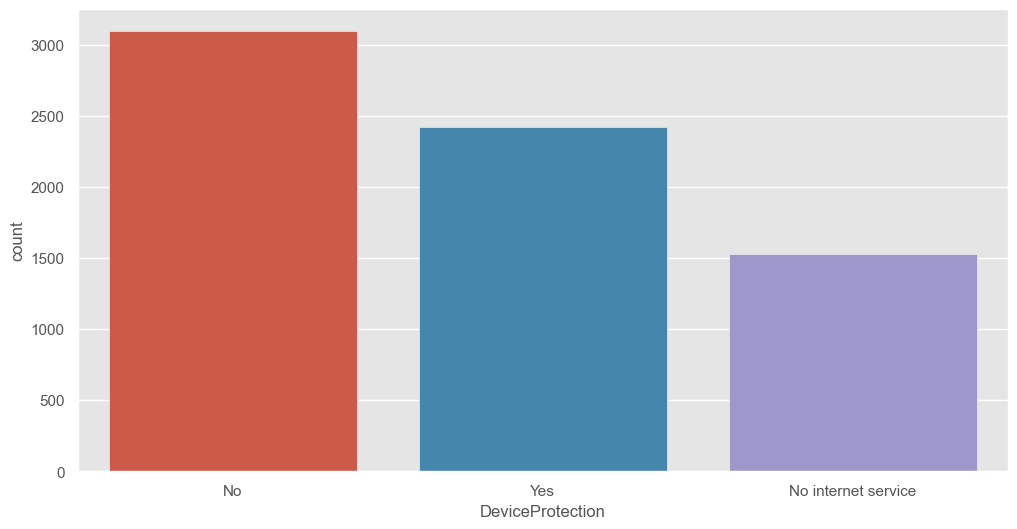

In [314]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'DeviceProtection')
df['DeviceProtection'].value_counts(1).sort_index

Churn                
                    count   sum      mean
DeviceProtection                         
No                   3095  1211  0.391276
No internet service  1526   113  0.074050
Yes                  2422   545  0.225021

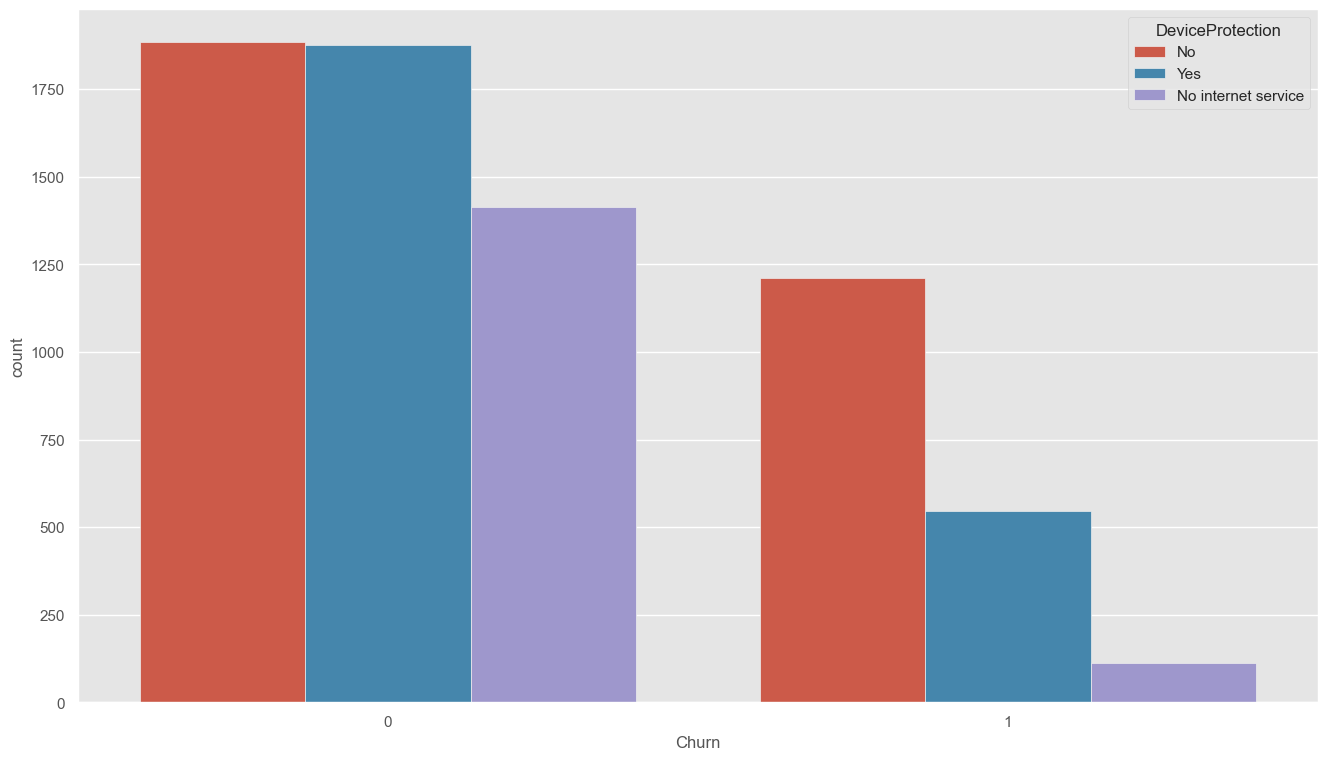

In [315]:
sns.countplot(x='Churn',data=df,hue='DeviceProtection')
df[['DeviceProtection', 'Churn']].groupby(['DeviceProtection'], as_index=False).agg(['count','sum','mean'])

### TechSupport

<bound method Series.sort_index of TechSupport
No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: proportion, dtype: float64>

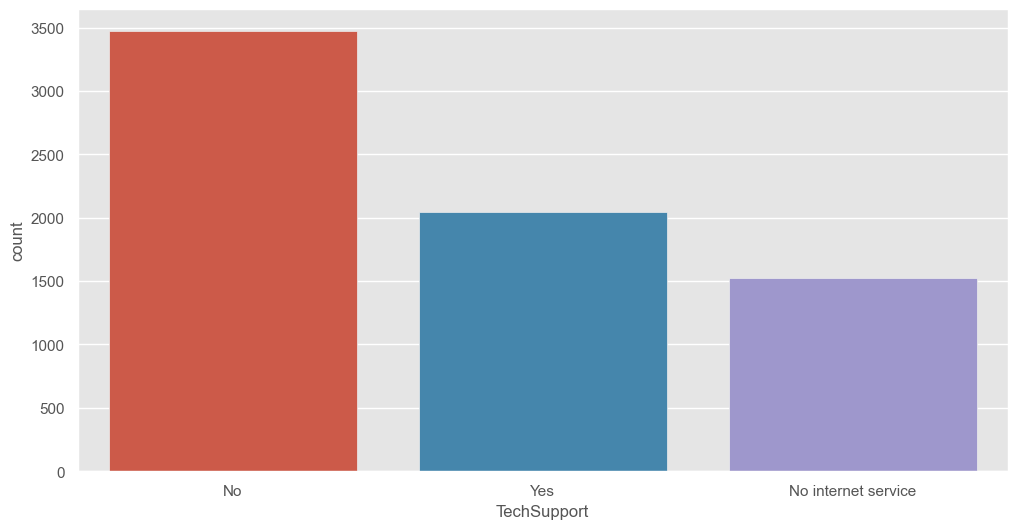

In [316]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'TechSupport')
df['TechSupport'].value_counts(1).sort_index

Churn                
                    count   sum      mean
TechSupport                              
No                   3473  1446  0.416355
No internet service  1526   113  0.074050
Yes                  2044   310  0.151663

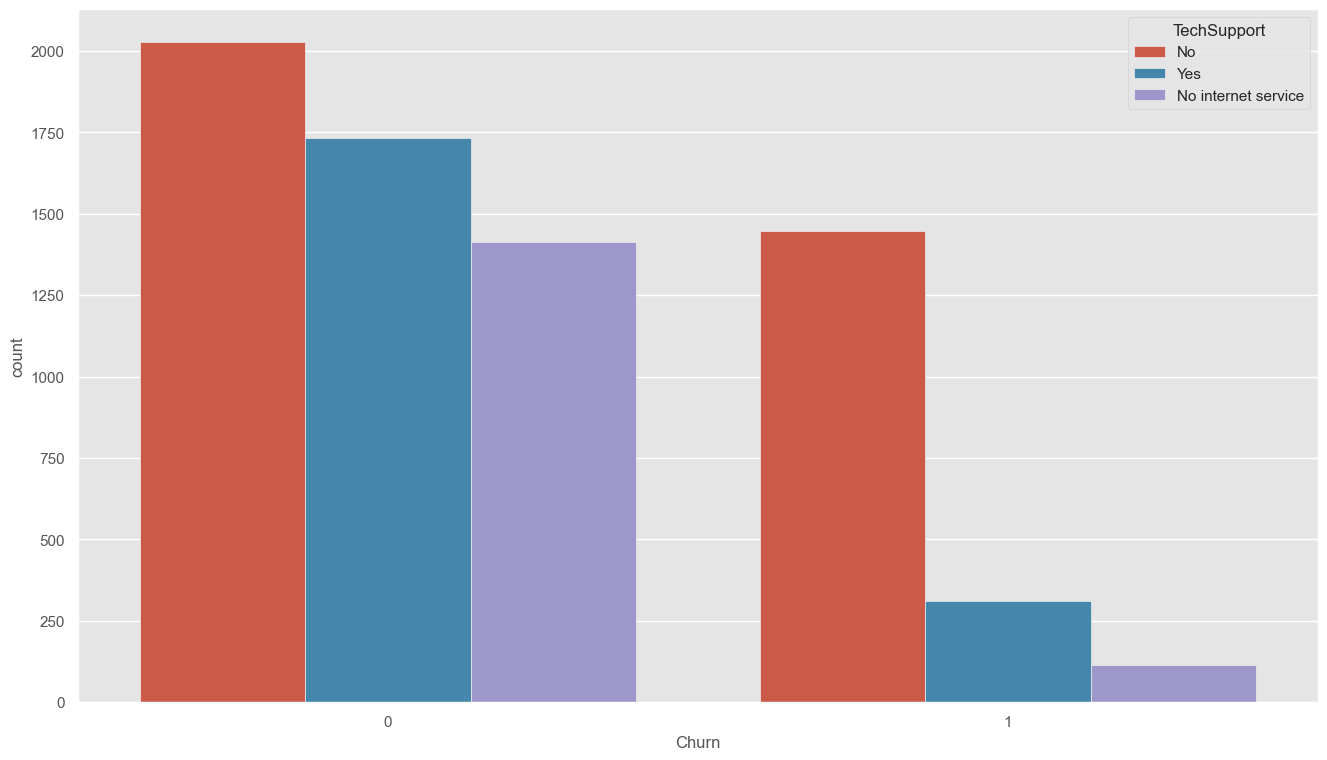

In [317]:
 sns.countplot(x='Churn',data=df,hue='TechSupport')
df[['TechSupport', 'Churn']].groupby(['TechSupport'], as_index=False).agg(['count','sum','mean'])

### StreamingTV

<bound method Series.sort_index of StreamingTV
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: proportion, dtype: float64>

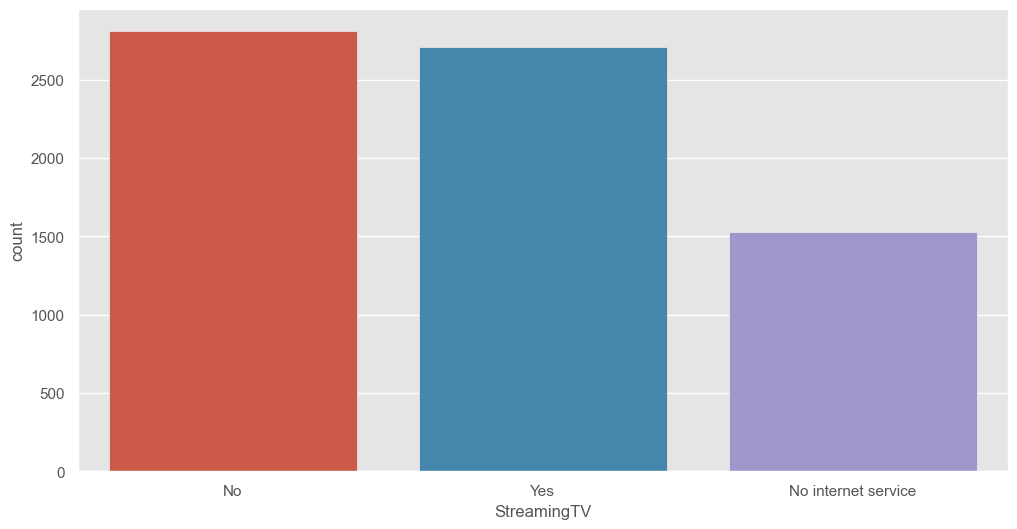

In [318]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'StreamingTV')
df['StreamingTV'].value_counts(1).sort_index

Churn               
                    count  sum      mean
StreamingTV                             
No                   2810  942  0.335231
No internet service  1526  113  0.074050
Yes                  2707  814  0.300702

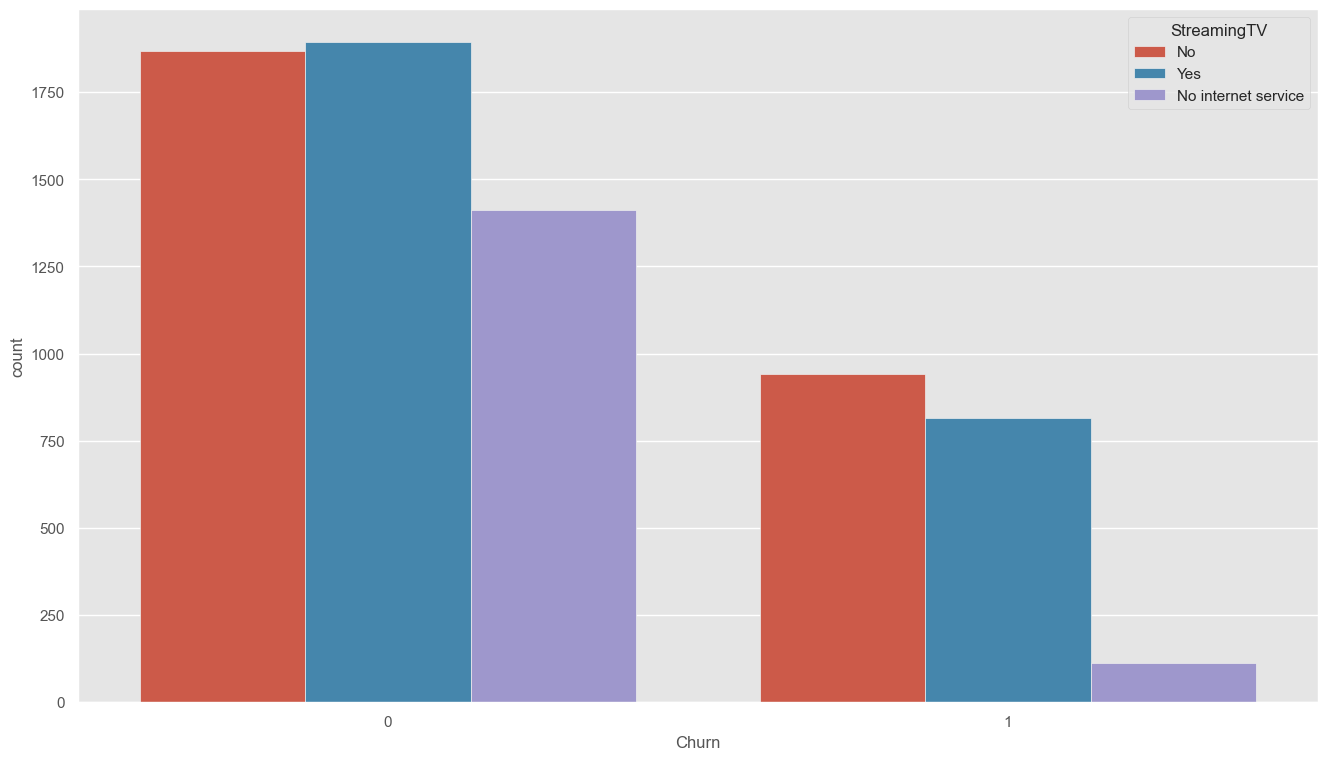

In [319]:
 sns.countplot(x='Churn',data=df,hue='StreamingTV')
df[['StreamingTV', 'Churn']].groupby(['StreamingTV'], as_index=False).agg(['count','sum','mean'])

### StreamingMovies

<bound method Series.sort_index of StreamingMovies
No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: proportion, dtype: float64>

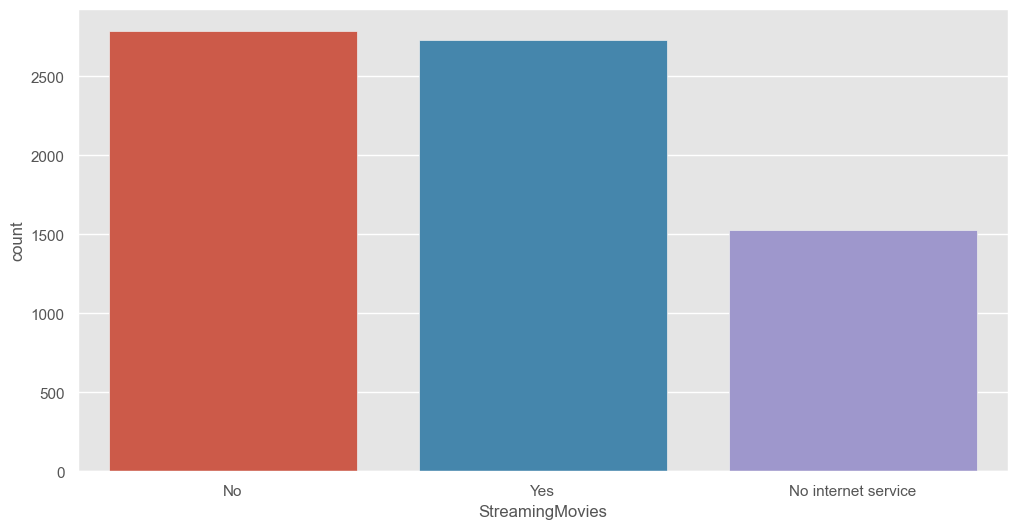

In [320]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'StreamingMovies')
df['StreamingMovies'].value_counts(1).sort_index

Churn               
                    count  sum      mean
StreamingMovies                         
No                   2785  938  0.336804
No internet service  1526  113  0.074050
Yes                  2732  818  0.299414

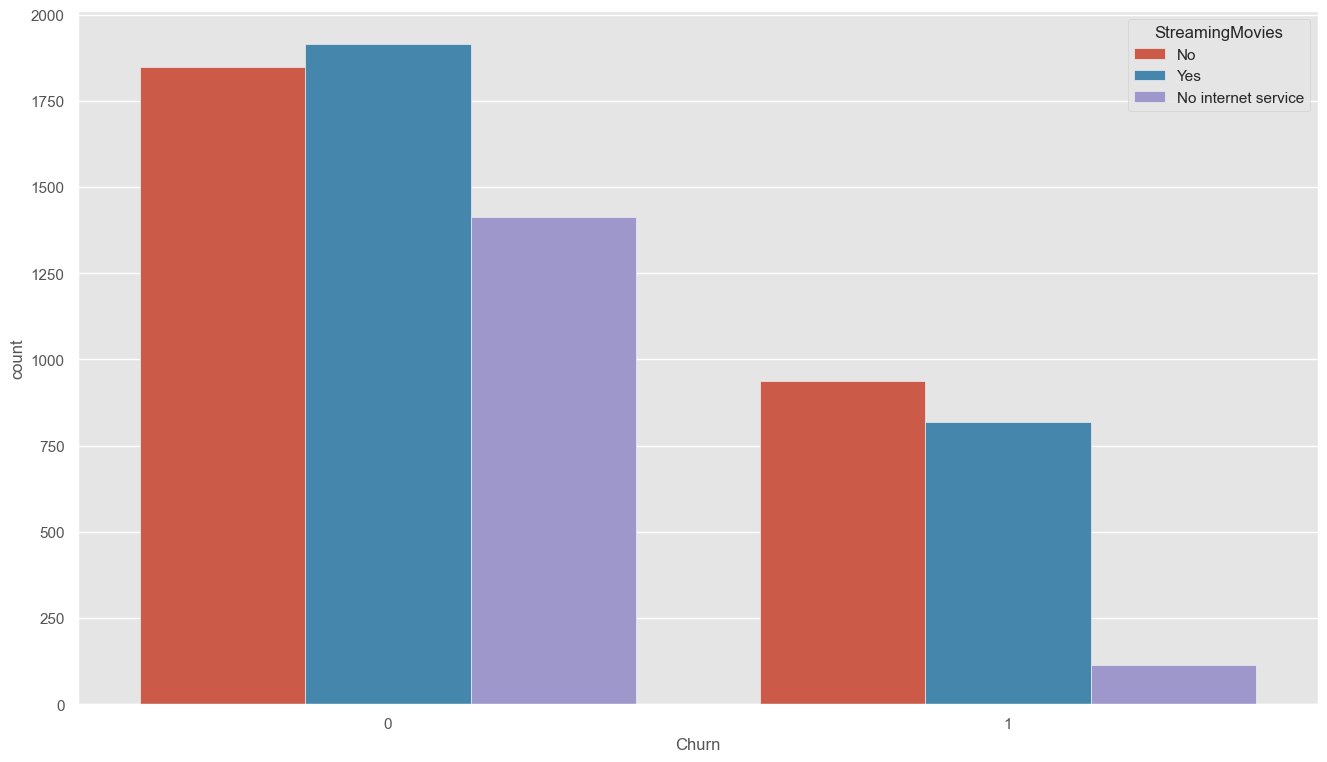

In [321]:
 sns.countplot(x='Churn',data=df,hue='StreamingMovies')
df[['StreamingMovies', 'Churn']].groupby(['StreamingMovies'], as_index=False).agg(['count','sum','mean'])

### Contract

<bound method Series.sort_index of Contract
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64>

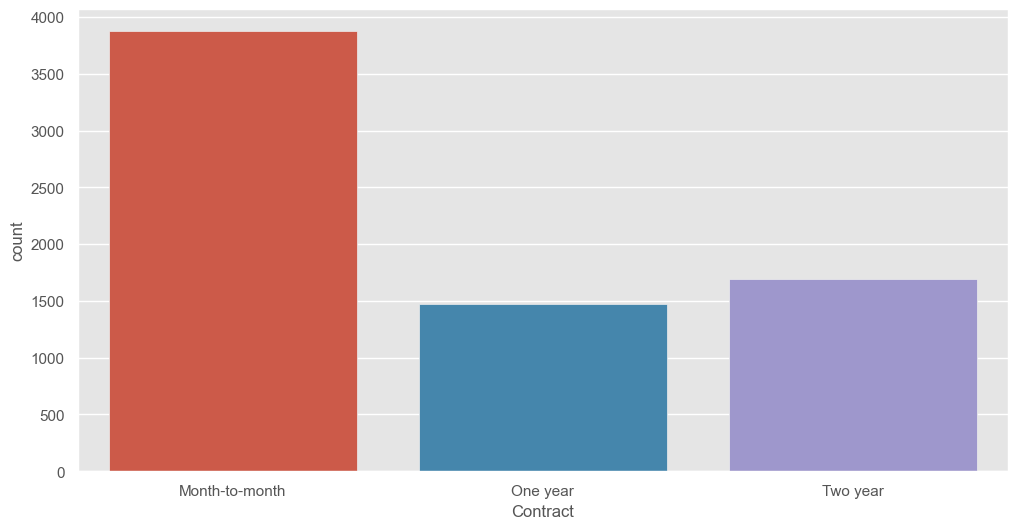

In [322]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'Contract')
df['Contract'].value_counts(1).sort_index

Churn                
               count   sum      mean
Contract                            
Month-to-month  3875  1655  0.427097
One year        1473   166  0.112695
Two year        1695    48  0.028319

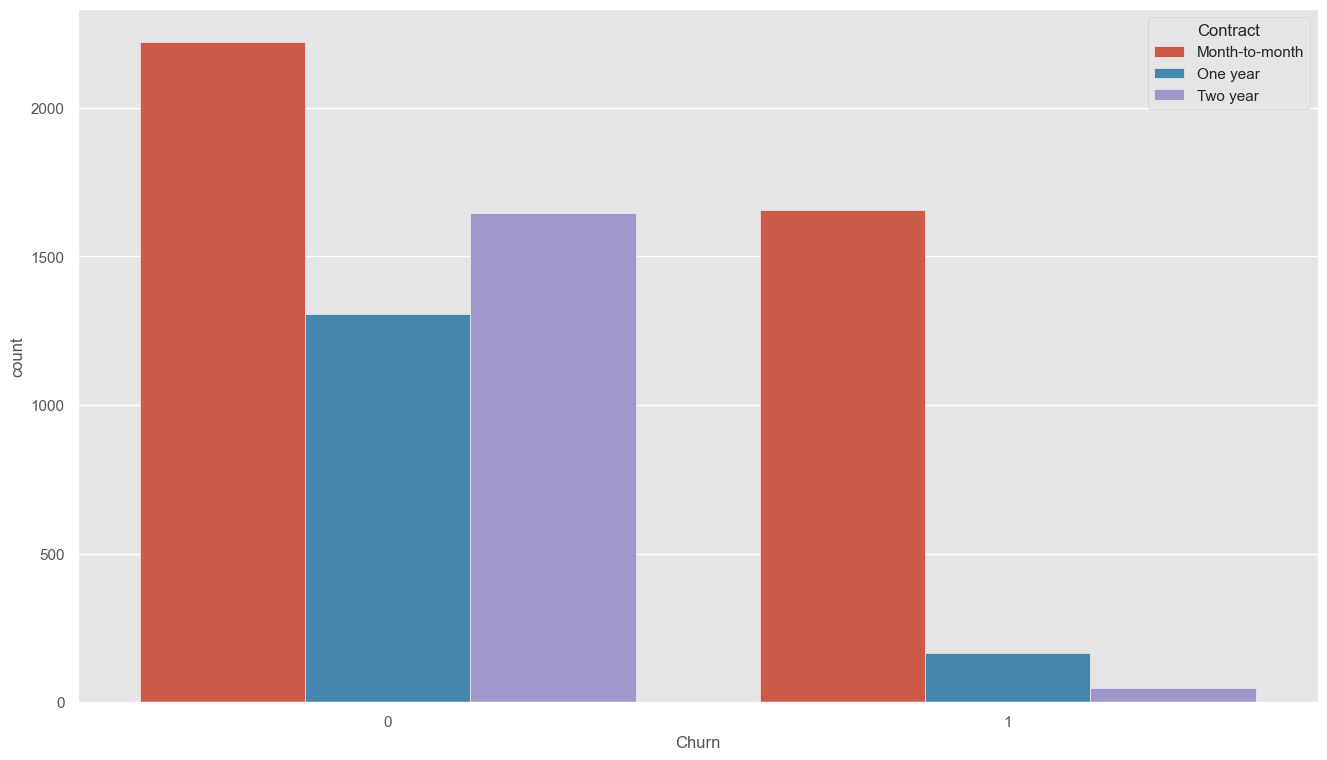

In [323]:
 sns.countplot(x='Churn',data=df,hue='Contract')
df[['Contract', 'Churn']].groupby(['Contract'], as_index=False).agg(['count','sum','mean'])

### PaperlessBilling

<bound method Series.sort_index of PaperlessBilling
Yes    0.592219
No     0.407781
Name: proportion, dtype: float64>

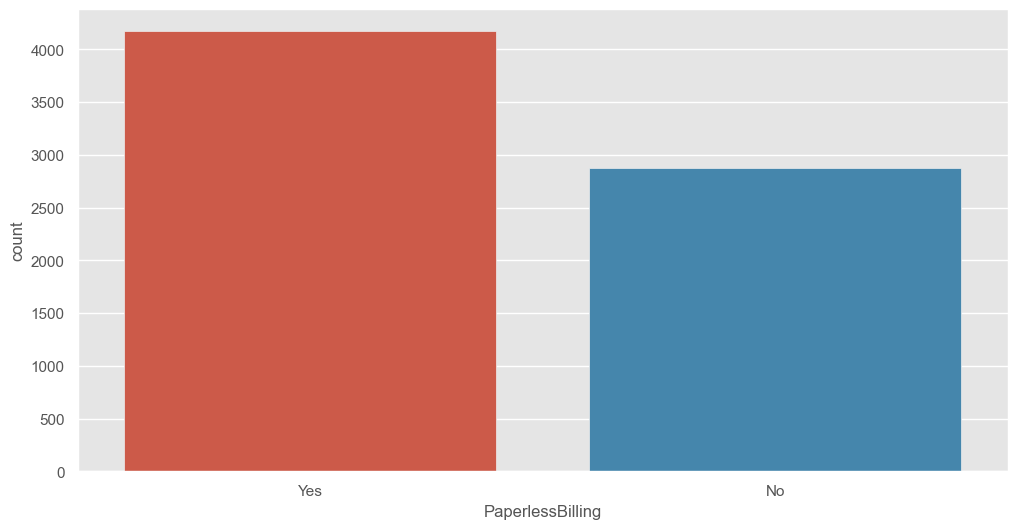

In [324]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'PaperlessBilling')
df['PaperlessBilling'].value_counts(1).sort_index

Churn                
                 count   sum      mean
PaperlessBilling                      
No                2872   469  0.163301
Yes               4171  1400  0.335651

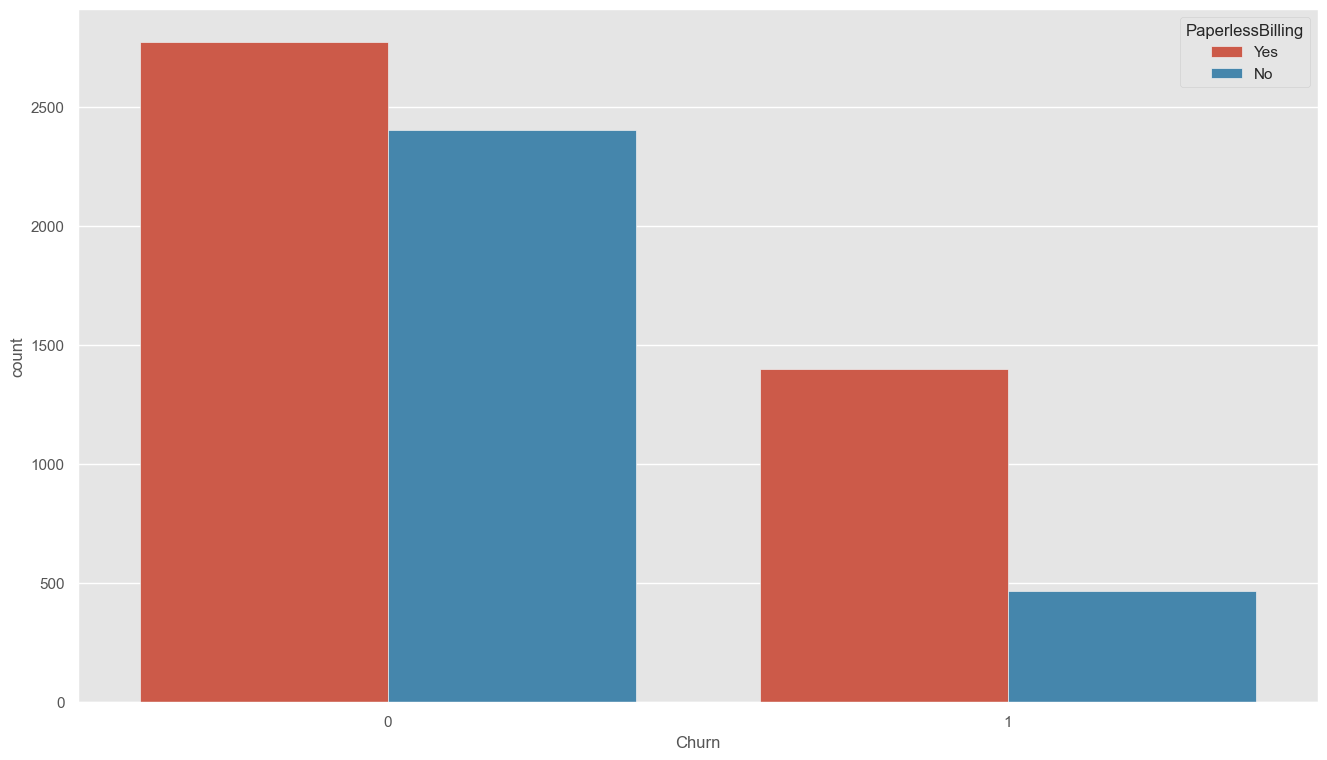

In [325]:
sns.countplot(x='Churn',data=df,hue='PaperlessBilling')
df[['PaperlessBilling', 'Churn']].groupby(['PaperlessBilling'], as_index=False).agg(['count','sum','mean'])

### PaymentMethod

<bound method Series.sort_index of PaymentMethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64>

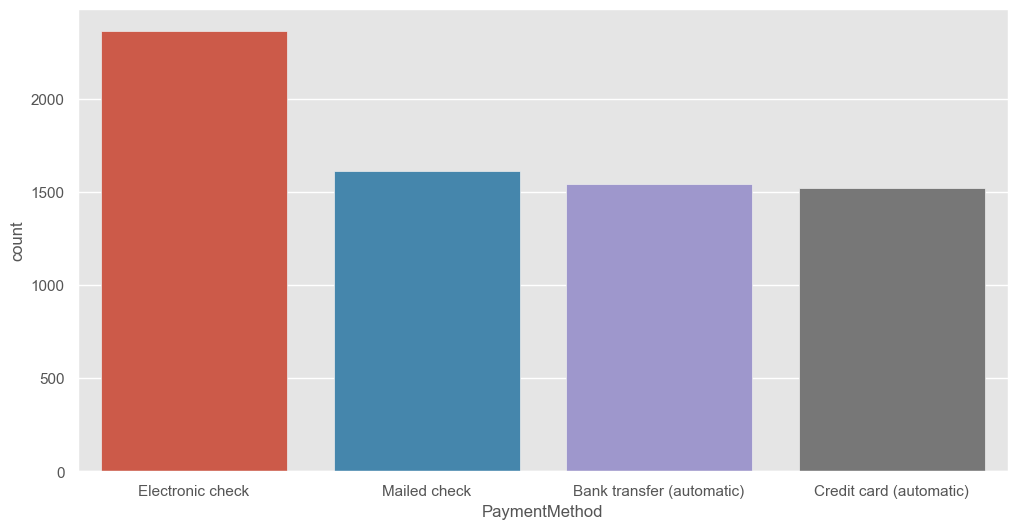

In [326]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'PaymentMethod')
df['PaymentMethod'].value_counts(1).sort_index

Churn                
                          count   sum      mean
PaymentMethod                                  
Bank transfer (automatic)  1544   258  0.167098
Credit card (automatic)    1522   232  0.152431
Electronic check           2365  1071  0.452854
Mailed check               1612   308  0.191067

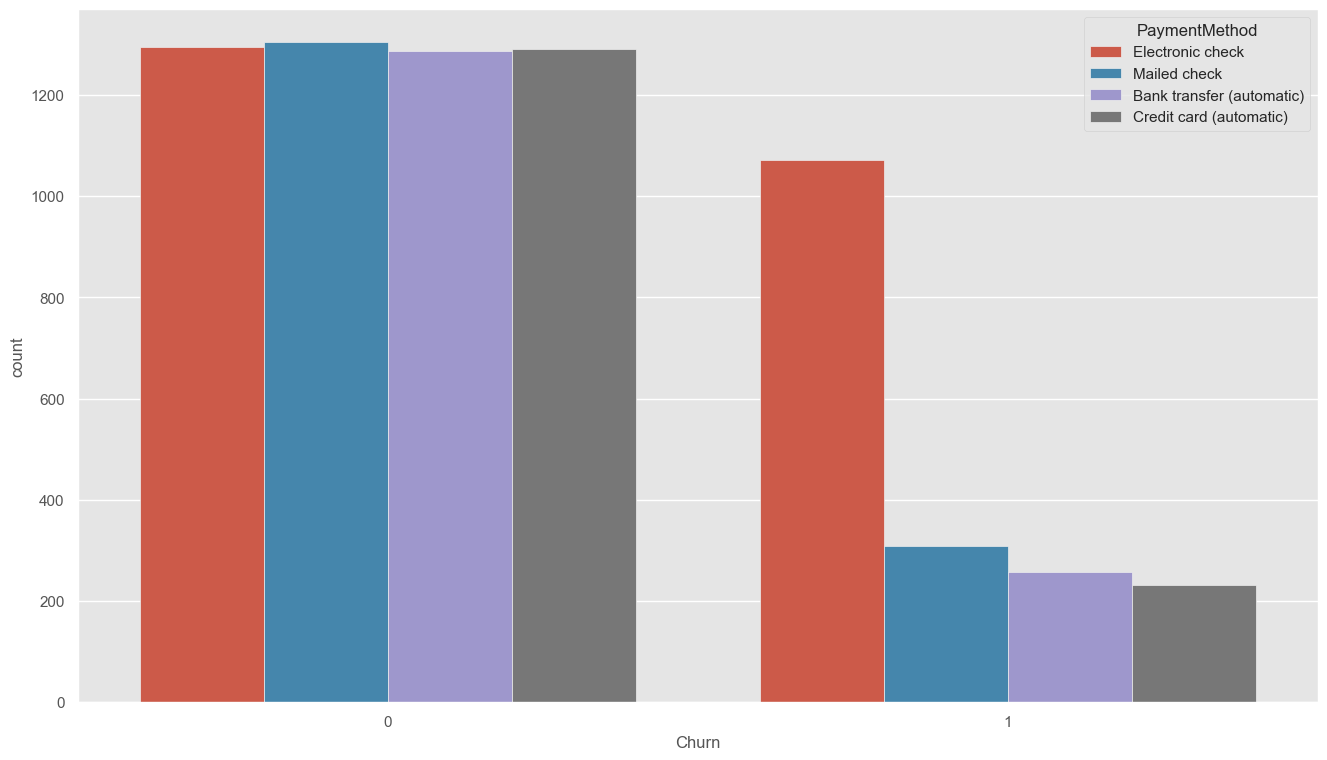

In [327]:
sns.countplot(x='Churn',data=df,hue='PaymentMethod')
df[['PaymentMethod', 'Churn']].groupby(['PaymentMethod'], as_index=False).agg(['count','sum','mean'])

### SeniorCitizen

<bound method Series.sort_index of SeniorCitizen
No     0.837853
Yes    0.162147
Name: proportion, dtype: float64>

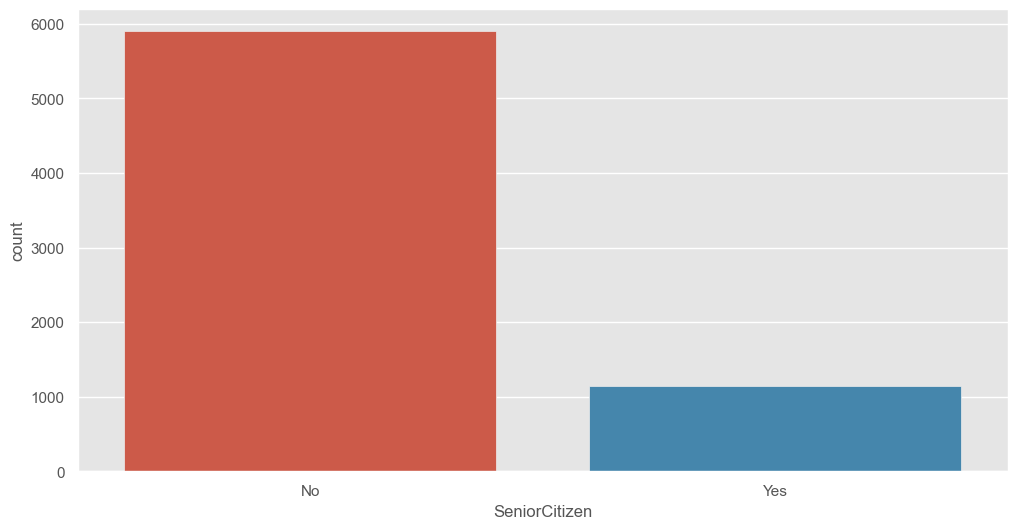

In [328]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorias, x = 'SeniorCitizen')
df['SeniorCitizen'].value_counts(1).sort_index

Churn                
              count   sum      mean
SeniorCitizen                      
No             5901  1393  0.236062
Yes            1142   476  0.416813

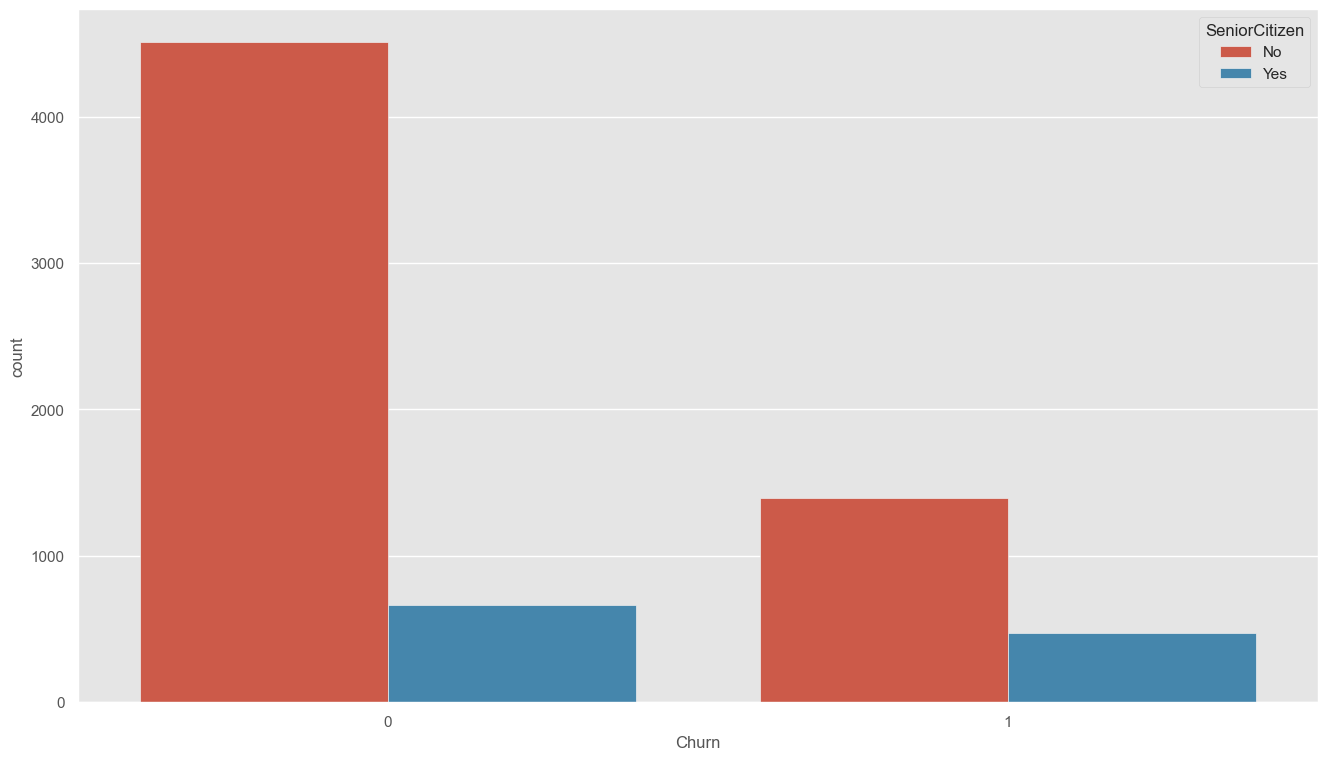

In [329]:
sns.countplot(x='Churn',data=df,hue='SeniorCitizen')
df[['SeniorCitizen', 'Churn']].groupby(['SeniorCitizen'], as_index=False).agg(['count','sum','mean'])


### Las variables seleccionadas son las siguientes: 

- Tenure
- SeniorCitizen
- InternetService
- OnlineSecurity
- OnlineBackup
- OnlineSecurity
- DeviceProtection
- TechSupport
- Paperlessbilling
- PaymentMethod 

In [330]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.265370
std,24.559481,30.090047,2266.771362,0.441561
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


<Axes: xlabel='tenure', ylabel='count'>

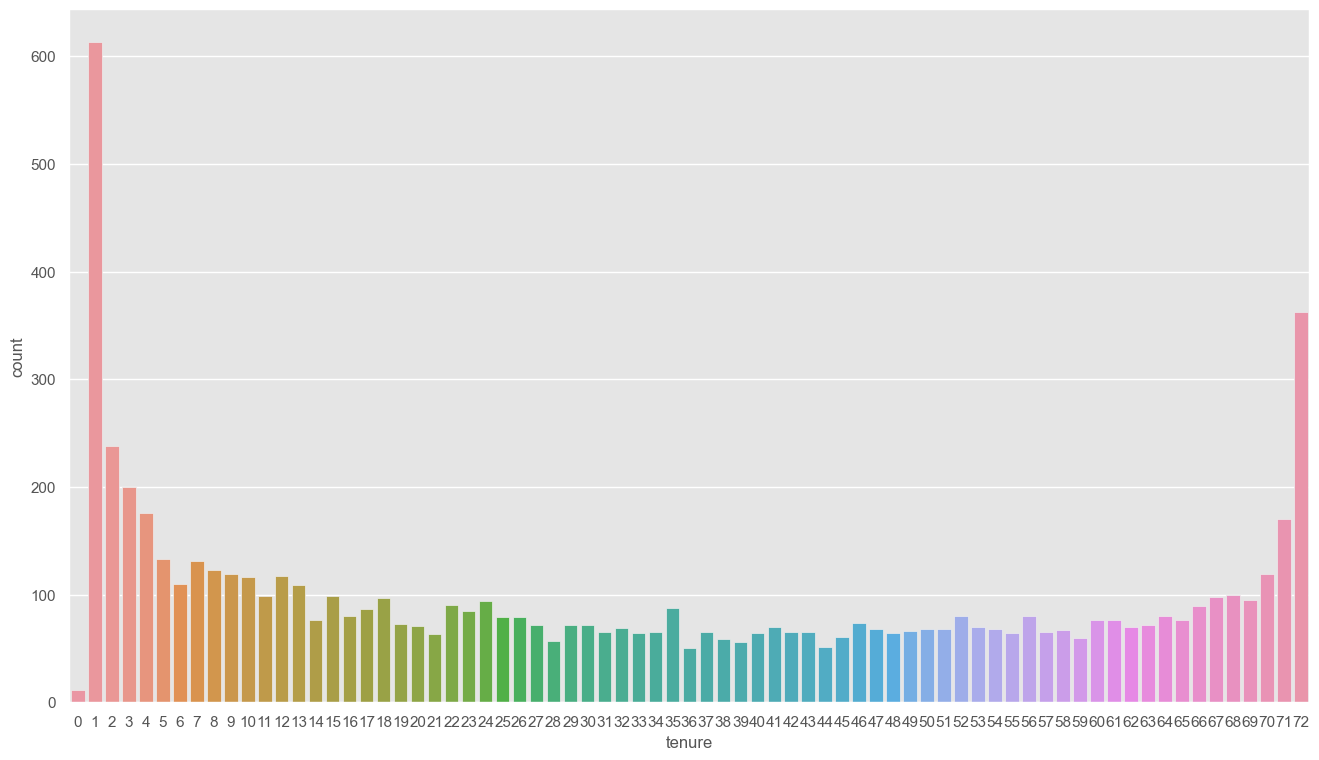

In [331]:
sns.countplot(data = df, x = "tenure")

<Axes: xlabel='PhoneService', ylabel='tenure'>

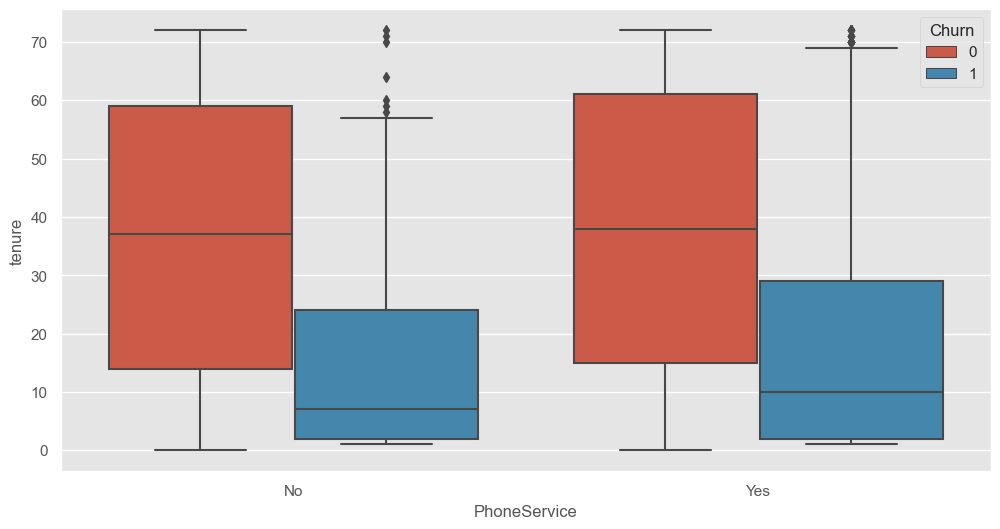

In [332]:
plt.figure(figsize=(12,6))
sns.boxplot(x="PhoneService",y="tenure", hue="Churn", data=df)

### Eliminación de Outliers

In [333]:
tenure_avg = df['tenure'].mean()
tenure_std = df['tenure'].std()
tenure_null_count = df['tenure'].isnull().sum()
tenure_null_random_list = np.random.randint(tenure_avg - tenure_std, tenure_avg + tenure_std, size=tenure_null_count)

conValoresNulos = np.isnan(df['tenure'])

df.loc[np.isnan(df['tenure']), 'tenure'] = tenure_null_random_list
df['tenure'] = df['tenure'].astype(int)

print("tenure Promedio: " + str(tenure_avg))
print("Desviación Std tenure: " + str(tenure_std))
print("Intervalo para asignar tenure aleatorio: " + str(int(tenure_avg - tenure_std)) + " a " + str(int(tenure_avg + tenure_std)))

tenure Promedio: 32.37114865824223
Desviación Std tenure: 24.55948102309423
Intervalo para asignar tenure aleatorio: 7 a 56


In [334]:
def tenure_fix(tenure):
    if tenure==0:
        return None
    return tenure

df['tenure']=df.apply(lambda x: tenure_fix(x['tenure']), axis=1)

In [335]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,No,Yes,No,1.0,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,7590-VHVEG
1,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,5575-GNVDE


In [336]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              11
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
customerID           0
dtype: int64

In [337]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7043.000000,7032.000000,7043.000000
mean,32.421786,64.761692,2283.300441,0.265370
std,24.545260,30.090047,2266.771362,0.441561
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


## MAPPING DE VARIABLES CUALITATIVAS

In [338]:
#Mapping de tenure
df.loc[ df['tenure'] <= 14 , 'tenure_Encoded'] 					       = 0
df.loc[(df['tenure'] > 14) & (df['tenure'] <= 29), 'tenure_Encoded'] = 1
df.loc[(df['tenure'] > 29) & (df['tenure'] <= 44), 'tenure_Encoded'] = 2
df.loc[(df['tenure'] > 44) & (df['tenure'] <= 59), 'tenure_Encoded'] = 3
df.loc[ df['tenure'] > 59, 'tenure_Encoded'] = 4


In [339]:
#Mapping de MonthlyCharges
df.loc[ df['MonthlyCharges'] <= 14 , 'MonthlyCharges_Encoded'] 					       = 0
df.loc[(df['MonthlyCharges'] > 14) & (df['MonthlyCharges'] <= 29), 'MonthlyCharges_Encoded'] = 1
df.loc[(df['MonthlyCharges'] > 29) & (df['MonthlyCharges'] <= 44), 'MonthlyCharges_Encoded'] = 2
df.loc[(df['MonthlyCharges'] > 44) & (df['MonthlyCharges'] <= 59), 'MonthlyCharges_Encoded'] = 3
df.loc[ df['MonthlyCharges'] > 59, 'MonthlyCharges_Encoded'] = 4

In [340]:
#Mapping de PhoneService
df['PhoneService_Encoded'] = df['PhoneService'].map( {'Yes': 1,
                                        'No': 0,
                                        '':0} ).astype(int)

In [341]:
#Mapping de InternetService
df['InternetService_Encoded'] = df['InternetService'].map( {'DSL': 1,
                                        'Fiber optic': 2,
                                        'No':0} ).astype(int)

In [342]:
#Mapping de OnlineSecurity
df['OnlineSecurity_Encoded'] = df['OnlineSecurity'].map( {'Yes': 2,
                                        'No': 1,
                                        'No internet service':0} ).astype(int)

In [343]:
#Mapping de OnlineBackup
df['OnlineBackup_Encoded'] = df['OnlineBackup'].map( {'Yes': 2,
                                        'No': 1,
                                        'No internet service':0} ).astype(int)

In [344]:
#Mapping de DeviceProtection
df['DeviceProtection_Encoded'] = df['DeviceProtection'].map( {'Yes': 2,
                                        'No': 1,
                                        'No internet service':0} ).astype(int)

In [345]:
#Mapping de TechSupport
df['TechSupport_Encoded'] = df['TechSupport'].map( {'Yes': 2,
                                        'No': 1,
                                        'No internet service':0} ).astype(int)

In [346]:
#Mapping de PaperlessBilling
df['PaperlessBilling_Encoded'] = df['PaperlessBilling'].map( {'Yes': 1,
                                        'No': 0} ).astype(int)

In [347]:
#Mapping de PaymentMethod
df['PaymentMethod_Encoded'] = df['PaymentMethod'].map( {'Electronic check': 0,
                                        'Mailed check': 1,
                                        'Bank transfer (automatic)': 2,
                                        'Credit card (automatic)': 3} ).astype(int)

In [348]:
#Mapping de SeniorCitizen
df['SeniorCitizen_Encoded'] = df['SeniorCitizen'].map( {'Yes': 1,
                                        'No': 0} ).astype(int)

In [349]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges_Encoded,PhoneService_Encoded,InternetService_Encoded,OnlineSecurity_Encoded,OnlineBackup_Encoded,DeviceProtection_Encoded,TechSupport_Encoded,PaperlessBilling_Encoded,PaymentMethod_Encoded,SeniorCitizen_Encoded
0,Female,No,Yes,No,1.0,No,No phone service,DSL,No,Yes,...,2.0,0,1,1,2,1,1,1,0,0
1,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,...,3.0,1,1,2,1,2,1,0,1,0
2,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,...,3.0,1,1,2,2,1,1,1,1,0
3,Male,No,No,No,45.0,No,No phone service,DSL,Yes,No,...,2.0,0,1,2,1,2,2,0,2,0
4,Female,No,No,No,2.0,Yes,No,Fiber optic,No,No,...,4.0,1,2,1,1,1,1,1,0,0


In [350]:
df.columns.values.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'customerID',
 'tenure_Encoded',
 'MonthlyCharges_Encoded',
 'PhoneService_Encoded',
 'InternetService_Encoded',
 'OnlineSecurity_Encoded',
 'OnlineBackup_Encoded',
 'DeviceProtection_Encoded',
 'TechSupport_Encoded',
 'PaperlessBilling_Encoded',
 'PaymentMethod_Encoded',
 'SeniorCitizen_Encoded']

In [351]:
drop_elements = ['gender',
 'Partner',
 'SeniorCitizen',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'customerID']
df_encoded = df.drop(drop_elements, axis = 1)

In [352]:
df_encoded.head(10)

,Churn,tenure_Encoded,MonthlyCharges_Encoded,PhoneService_Encoded,InternetService_Encoded,OnlineSecurity_Encoded,OnlineBackup_Encoded,DeviceProtection_Encoded,TechSupport_Encoded,PaperlessBilling_Encoded,PaymentMethod_Encoded,SeniorCitizen_Encoded
0,0,0.0,2.0,0,1,1,2,1,1,1,0,0
1,0,2.0,3.0,1,1,2,1,2,1,0,1,0
2,1,0.0,3.0,1,1,2,2,1,1,1,1,0
3,0,3.0,2.0,0,1,2,1,2,2,0,2,0
4,1,0.0,4.0,1,2,1,1,1,1,1,0,0
5,1,0.0,4.0,1,2,1,1,2,1,1,0,0
6,0,1.0,4.0,1,2,1,2,1,1,1,3,0
7,0,0.0,2.0,0,1,2,1,1,1,0,1,0
8,1,1.0,4.0,1,2,1,1,2,2,1,0,0
9,0,4.0,3.0,1,1,2,2,1,1,0,2,0


In [353]:
df_encoded.isna().sum()

Churn                        0
tenure_Encoded              11
MonthlyCharges_Encoded       0
PhoneService_Encoded         0
InternetService_Encoded      0
OnlineSecurity_Encoded       0
OnlineBackup_Encoded         0
DeviceProtection_Encoded     0
TechSupport_Encoded          0
PaperlessBilling_Encoded     0
PaymentMethod_Encoded        0
SeniorCitizen_Encoded        0
dtype: int64

In [354]:
df_encoded['tenure_Encoded']=df_encoded['tenure_Encoded'].fillna(0)

In [355]:
df_encoded.isna().sum()

Churn                       0
tenure_Encoded              0
MonthlyCharges_Encoded      0
PhoneService_Encoded        0
InternetService_Encoded     0
OnlineSecurity_Encoded      0
OnlineBackup_Encoded        0
DeviceProtection_Encoded    0
TechSupport_Encoded         0
PaperlessBilling_Encoded    0
PaymentMethod_Encoded       0
SeniorCitizen_Encoded       0
dtype: int64

In [356]:
df_encoded = df_encoded.dropna()

In [357]:
df_encoded.describe()

,Churn,tenure_Encoded,MonthlyCharges_Encoded,PhoneService_Encoded,InternetService_Encoded,OnlineSecurity_Encoded,OnlineBackup_Encoded,DeviceProtection_Encoded,TechSupport_Encoded,PaperlessBilling_Encoded,PaymentMethod_Encoded,SeniorCitizen_Encoded
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,1.722987,3.096550,0.903166,1.222916,1.069999,1.128212,1.127219,1.073548,0.592219,1.315633,0.162147
std,0.441561,1.558139,1.244262,0.295752,0.778877,0.706051,0.738369,0.737868,0.708201,0.491457,1.148907,0.368612
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,3.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000
max,1.000000,4.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


<Axes: title={'center': 'Pearson Correlation of Features'}>

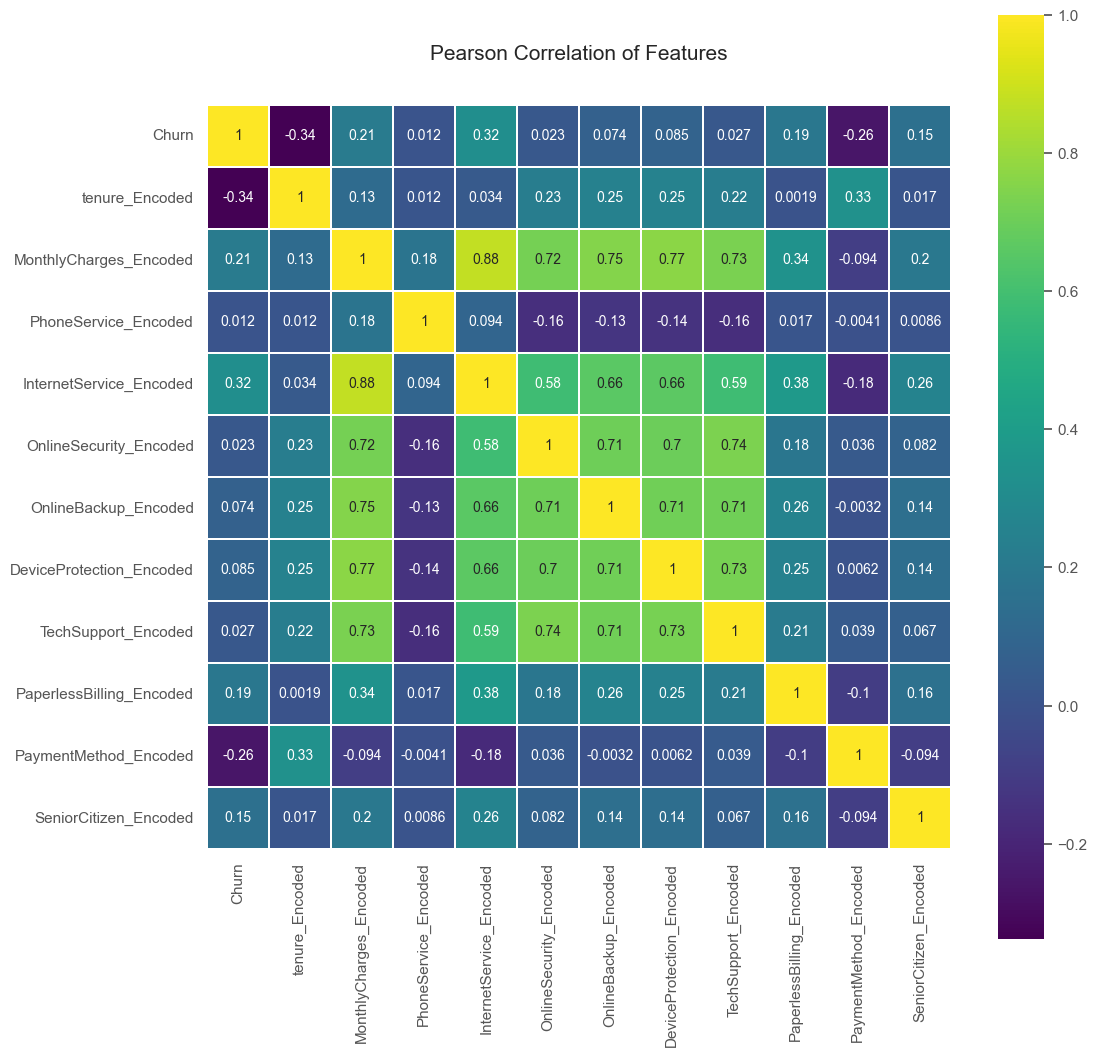

In [358]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_encoded.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Segun lo anterior las variables más criticas son 'tenure_Encoded', 'MonthlyCharges_Encoded','InternetService_Encoded', 'PaymentMethod_Ecoded', 'PaperlessBilling_Encoded', 'SeniorCitizen_Enconded'. 

In [359]:
df_encoded[['tenure_Encoded', 'Churn']].groupby(['tenure_Encoded'], as_index=False).agg(['mean', 'count', 'sum'])

Churn            
                    mean count   sum
tenure_Encoded                      
0.0             0.463518  2371  1099
1.0             0.258765  1198   310
2.0             0.212810   968   206
3.0             0.151515  1023   155
4.0             0.066757  1483    99

In [360]:
df_encoded[['MonthlyCharges_Encoded', 'Churn']].groupby(['MonthlyCharges_Encoded'], as_index=False).agg(['mean', 'count', 'sum'])

Churn            
                            mean count   sum
MonthlyCharges_Encoded                      
1.0                     0.093226  1609   150
2.0                     0.274448   317    87
3.0                     0.269401   902   243
4.0                     0.329537  4215  1389

In [361]:
df_encoded[['InternetService_Encoded', 'Churn']].groupby(['InternetService_Encoded'], as_index=False).agg(['mean', 'count', 'sum'])

Churn            
                             mean count   sum
InternetService_Encoded                      
0                        0.074050  1526   113
1                        0.189591  2421   459
2                        0.418928  3096  1297

In [362]:
df_encoded[['PaymentMethod_Encoded', 'Churn']].groupby(['PaymentMethod_Encoded'], as_index=False).agg(['mean', 'count', 'sum'])

Churn            
                           mean count   sum
PaymentMethod_Encoded                      
0                      0.452854  2365  1071
1                      0.191067  1612   308
2                      0.167098  1544   258
3                      0.152431  1522   232

In [363]:
df_encoded[['PaperlessBilling_Encoded', 'Churn']].groupby(['PaperlessBilling_Encoded'], as_index=False).agg(['mean', 'count', 'sum'])

Churn            
                              mean count   sum
PaperlessBilling_Encoded                      
0                         0.163301  2872   469
1                         0.335651  4171  1400

In [364]:
df_encoded[['SeniorCitizen_Encoded', 'Churn']].groupby(['SeniorCitizen_Encoded'], as_index=False).agg(['mean', 'count', 'sum'])

Churn            
                           mean count   sum
SeniorCitizen_Encoded                      
0                      0.236062  5901  1393
1                      0.416813  1142   476

#### Se observa que:
- a menor tiempo en la compañia es mas propenso a fuga
- las personass de la tercera edad no presentan tanta fuga
- El metodo de pago influye en la fuga, teniendo un desbalance en la categoria 1
- Las pernas que tienen facturación electronica son las que más presentan juga
- A mayor costo mensual, mayor probalidad de fuga


# MUESTREO: Undersampling

## DESBALANCE DE LA MUESTRA:

In [365]:
df_encoded.groupby('Churn').size()

Churn
0    5174
1    1869
dtype: int64

Class 0 No Fuga: 5174
Class 1 Fuga 1869
Proporción: 2.77 : 1


<Axes: title={'center': 'Count (target)'}, xlabel='Churn'>

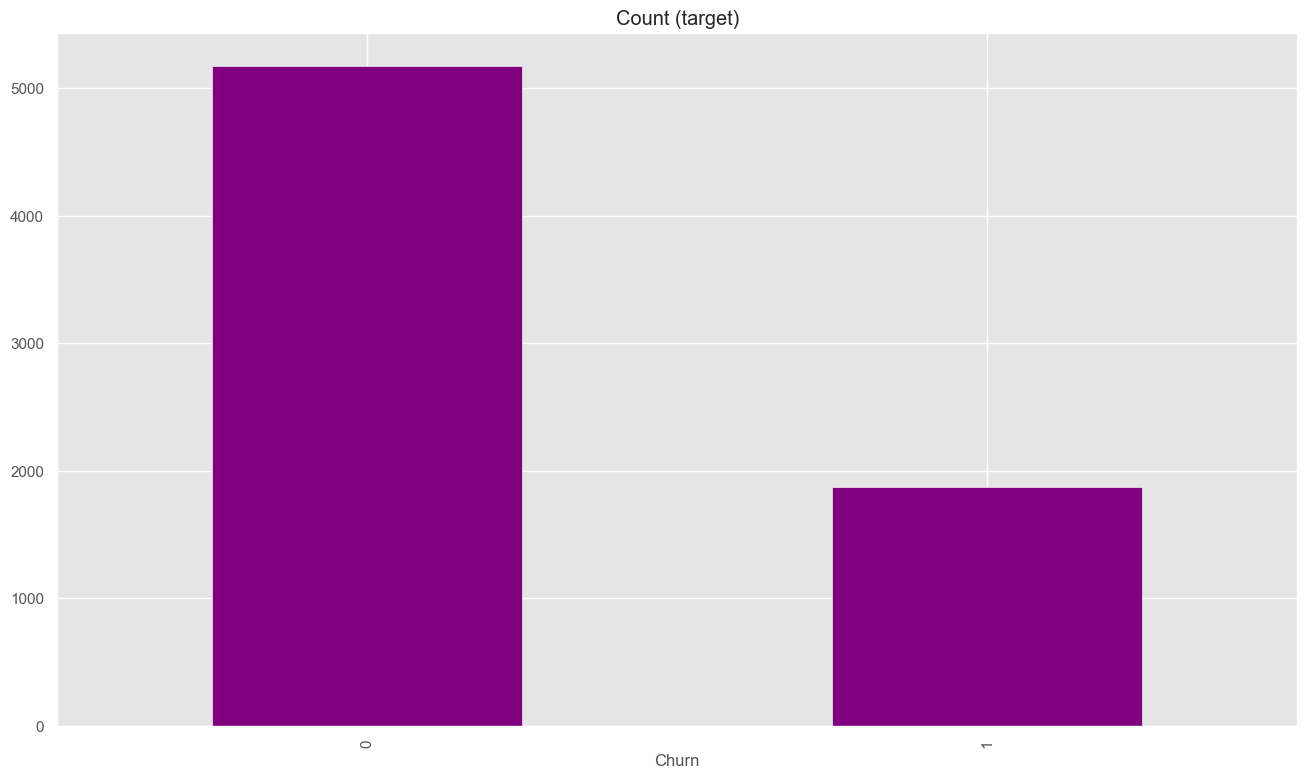

In [366]:
target_count = df_encoded.Churn.value_counts()
print('Class 0 No Fuga:', target_count[0])
print('Class 1 Fuga', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', color='purple',title='Count (target)')


Se observa un desbalance moderado a simple vista

## Separando una muestra para verificar resultado de estrategias de muestreo


In [367]:
# Seleccionaremos un 20% de los datos para estudiar el beneficio de las estategias de muestreo

X = df_encoded[['tenure_Encoded',
 'MonthlyCharges_Encoded',
 'PhoneService_Encoded',
 'InternetService_Encoded',
 'OnlineSecurity_Encoded',
 'OnlineBackup_Encoded',
 'DeviceProtection_Encoded',
 'TechSupport_Encoded',
 'PaperlessBilling_Encoded',
 'PaymentMethod_Encoded',
 'SeniorCitizen_Encoded']]
y = df_encoded[['Churn']]

#np.random.seed(101)
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=101)

## Undersampling


In [368]:
df_train = pd.concat([X_train,y_train],axis=1)

In [369]:
df_train.head()

,tenure_Encoded,MonthlyCharges_Encoded,PhoneService_Encoded,InternetService_Encoded,OnlineSecurity_Encoded,OnlineBackup_Encoded,DeviceProtection_Encoded,TechSupport_Encoded,PaperlessBilling_Encoded,PaymentMethod_Encoded,SeniorCitizen_Encoded,Churn
240,4.0,4.0,1,1,1,2,2,2,0,2,0,0
850,4.0,4.0,1,2,2,2,2,2,1,2,0,0
2128,2.0,4.0,1,1,2,2,2,1,1,3,0,0
596,1.0,3.0,0,1,2,2,2,2,0,1,0,0
206,4.0,3.0,0,1,2,2,2,2,1,3,0,0


In [370]:
df_train.shape

(5634, 12)

In [371]:
#División del traget
count_class_0, count_class_1 = df_train.Churn.value_counts()

# Divide by class
df_class_0 = df_train[df_train['Churn'] == 0]
df_class_1 = df_train[df_train['Churn'] == 1]

In [372]:
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(4148, 4148, 1486, 1486)

In [373]:
df_class_0.sample(3)

,tenure_Encoded,MonthlyCharges_Encoded,PhoneService_Encoded,InternetService_Encoded,OnlineSecurity_Encoded,OnlineBackup_Encoded,DeviceProtection_Encoded,TechSupport_Encoded,PaperlessBilling_Encoded,PaymentMethod_Encoded,SeniorCitizen_Encoded,Churn
4743,3.0,4.0,1,1,1,2,2,1,0,3,0,0
4494,0.0,4.0,1,2,1,2,1,1,0,0,0,0
480,0.0,1.0,1,0,0,0,0,0,0,1,0,0


Estrategia de Muestreo under-sampling:
Churn
0    1486
1    1486
Name: count, dtype: int64


<Axes: title={'center': 'Cantidad (target)'}, xlabel='Churn'>

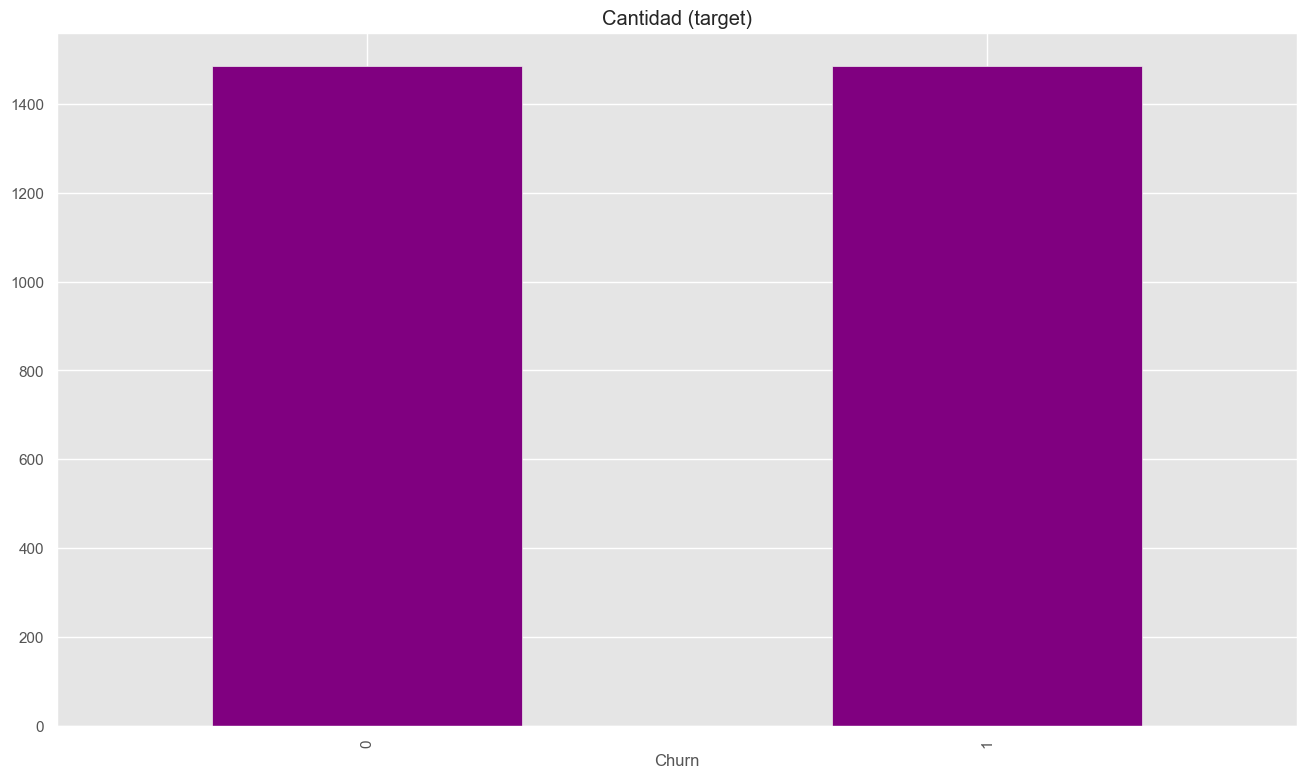

In [374]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Estrategia de Muestreo under-sampling:')
print(df_test_under.Churn.value_counts())

df_test_under.Churn.value_counts().plot(kind='bar', color='purple', title='Cantidad (target)')

## OVERSAMPLING

In [375]:
aux = df_class_1.head(2)
aux.sample(4,replace=True)

,tenure_Encoded,MonthlyCharges_Encoded,PhoneService_Encoded,InternetService_Encoded,OnlineSecurity_Encoded,OnlineBackup_Encoded,DeviceProtection_Encoded,TechSupport_Encoded,PaperlessBilling_Encoded,PaymentMethod_Encoded,SeniorCitizen_Encoded,Churn
1486,0.0,3.0,1,1,1,2,1,2,1,3,0,1
1486,0.0,3.0,1,1,1,2,1,2,1,3,0,1
365,0.0,4.0,1,2,1,1,2,1,0,2,0,1
365,0.0,4.0,1,2,1,1,2,1,0,2,0,1


Random over-sampling:
Churn
0    4148
1    4148
Name: count, dtype: int64


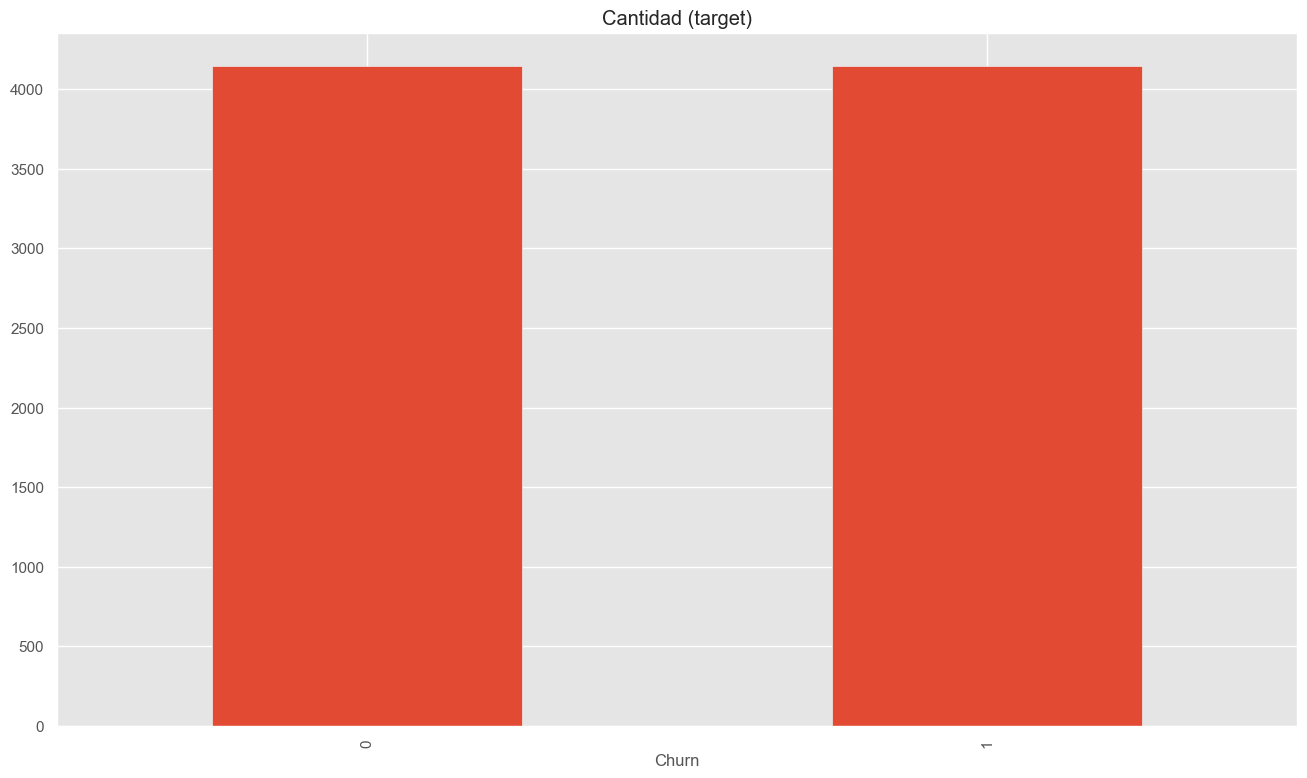

In [376]:
# hay un riesgo de que algunas filas no sean consideradas porque la aletoriedad las ignorara
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

df_test_over.Churn.value_counts().plot(kind='bar', title='Cantidad (target)');

# MODELAMIENTO y MATRIZ DE CONFUSIÓN: TREECLASSIFIER//UNDERSAMPLING//OVERSAMPLING

## **DATOS ORIGINALES:**

In [377]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy DATOS ORIGINALES: 75.37%
Log Loss: 8.506081016516442


El logloss presenta un valor elevado

Matriz de Confusión - DATOS ORIGINALES:
 [[885 141]
 [206 177]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      1026
           1       0.56      0.46      0.50       383

    accuracy                           0.75      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.74      0.75      0.75      1409



C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_6552\2232764960.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_6552\2232764960.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


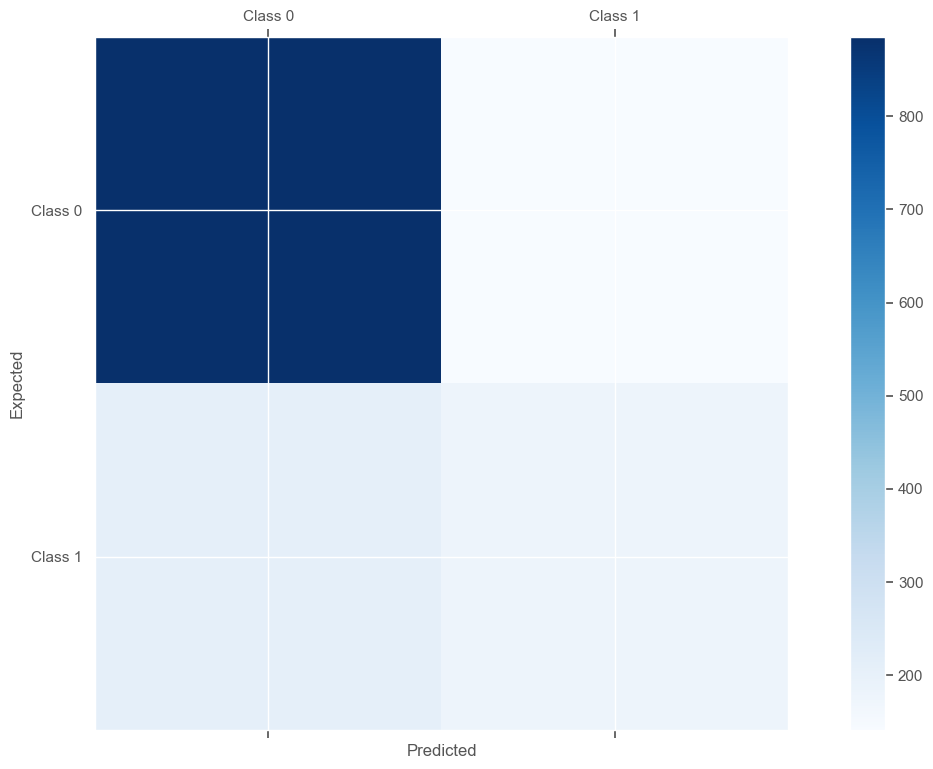

In [378]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## **UNDERSAMPLING**

In [379]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train_u= df_test_under[['tenure_Encoded',
 'MonthlyCharges_Encoded',
 'PhoneService_Encoded',
 'InternetService_Encoded',
 'OnlineSecurity_Encoded',
 'OnlineBackup_Encoded',
 'DeviceProtection_Encoded',
 'TechSupport_Encoded',
 'PaperlessBilling_Encoded',
 'PaymentMethod_Encoded',
 'SeniorCitizen_Encoded']]
y_train_u = df_test_under[['Churn']]

model.fit(X_train_u, y_train_u)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy UNDERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy UNDERSAMPLING: 71.33%
Log Loss: 9.90339812039


Matriz de Confusión UNDERSAMPLING:
 [[748 278]
 [126 257]]
Métricas de Matriz de Confusión - UNDERSAMPLING:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79      1026
           1       0.48      0.67      0.56       383

    accuracy                           0.71      1409
   macro avg       0.67      0.70      0.67      1409
weighted avg       0.75      0.71      0.73      1409



C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_6552\1435473090.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_6552\1435473090.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


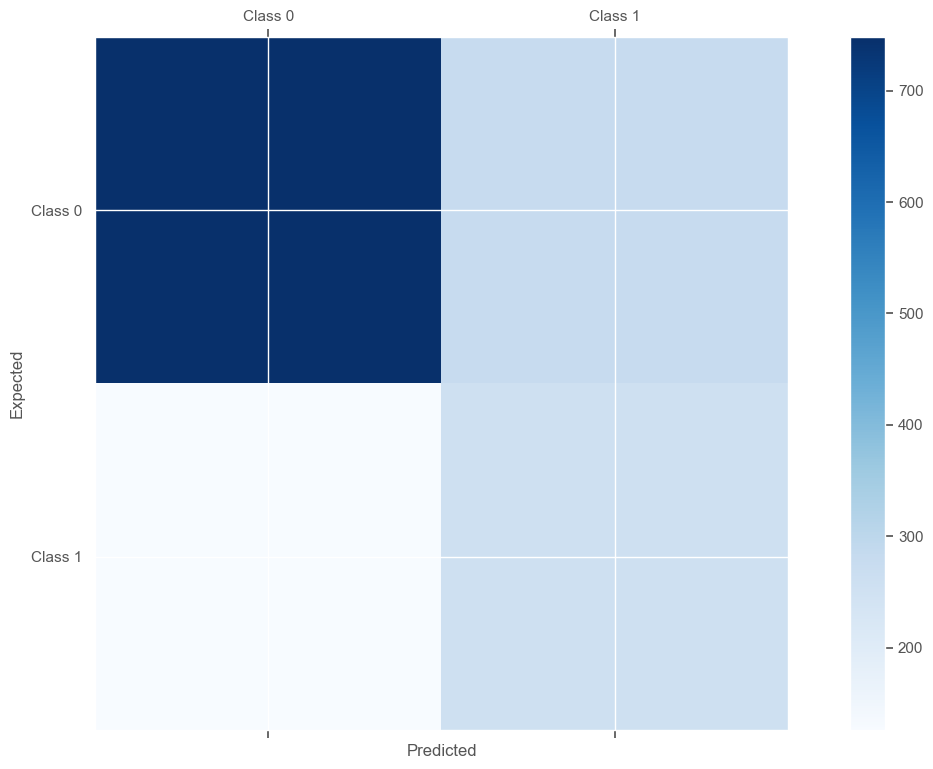

In [380]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión UNDERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - UNDERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## **OVERSAMPLING**

In [381]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train_o= df_test_over[['tenure_Encoded',
 'MonthlyCharges_Encoded',
 'PhoneService_Encoded',
 'InternetService_Encoded',
 'OnlineSecurity_Encoded',
 'OnlineBackup_Encoded',
 'DeviceProtection_Encoded',
 'TechSupport_Encoded',
 'PaperlessBilling_Encoded',
 'PaymentMethod_Encoded',
 'SeniorCitizen_Encoded']]
y_train_o = df_test_over[['Churn']]

model.fit(X_train_o, y_train_o)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING: 73.88%
Log Loss: 9.020905620673078


Matriz de Confusión OVERSAMPLING:
 [[793 233]
 [135 248]]
Métricas de Matriz de Confusión - OVERSAMPLING:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      1026
           1       0.52      0.65      0.57       383

    accuracy                           0.74      1409
   macro avg       0.69      0.71      0.69      1409
weighted avg       0.76      0.74      0.75      1409



C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_6552\2049255932.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_6552\2049255932.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


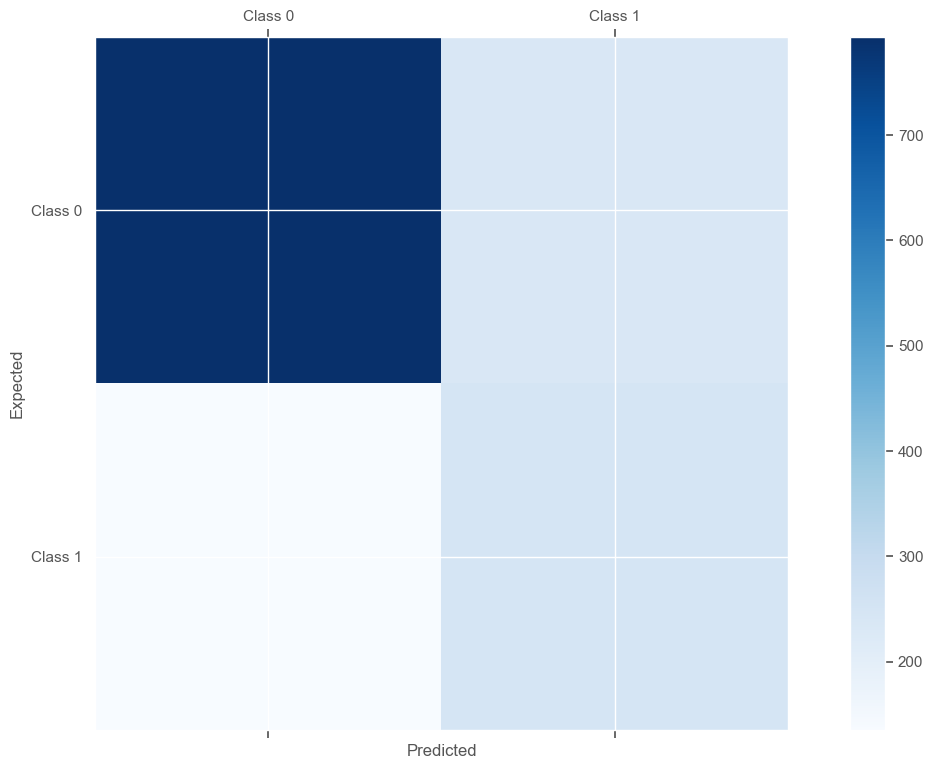

In [382]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión OVERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - OVERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [383]:
Tabla= pd.DataFrame({'algoritmo': ['Original','Undersampling','Oversampling'],
                     'precisión': [0.55, 0.49, 0.53],
                     'recall': [0.47, 0.67, 0.66]})
Tabla

,algoritmo,precisión,recall
0,Original,0.55,0.47
1,Undersampling,0.49,0.67
2,Oversampling,0.53,0.66


# UTILIZANDO OTROS MODELOS:

In [384]:
df_encoded.head()

,Churn,tenure_Encoded,MonthlyCharges_Encoded,PhoneService_Encoded,InternetService_Encoded,OnlineSecurity_Encoded,OnlineBackup_Encoded,DeviceProtection_Encoded,TechSupport_Encoded,PaperlessBilling_Encoded,PaymentMethod_Encoded,SeniorCitizen_Encoded
0,0,0.0,2.0,0,1,1,2,1,1,1,0,0
1,0,2.0,3.0,1,1,2,1,2,1,0,1,0
2,1,0.0,3.0,1,1,2,2,1,1,1,1,0
3,0,3.0,2.0,0,1,2,1,2,2,0,2,0
4,1,0.0,4.0,1,2,1,1,1,1,1,0,0


In [385]:
df_encoded.shape

(7043, 12)

In [386]:
# Seleccionaremos un 35% de los datos para estrudiar el beneficio de las estrategias de muestreo

X = df_encoded[['tenure_Encoded',
 'MonthlyCharges_Encoded',
 'PhoneService_Encoded',
 'InternetService_Encoded',
 'OnlineSecurity_Encoded',
 'OnlineBackup_Encoded',
 'DeviceProtection_Encoded',
 'TechSupport_Encoded',
 'PaperlessBilling_Encoded',
 'PaymentMethod_Encoded',
 'SeniorCitizen_Encoded']]
y = df_encoded[['Churn']]

#np.random.seed(101)
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)

In [387]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [388]:
import xgboost as xgb

In [389]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier() # MALA PRACTICA

In [390]:
# parameters tunning
# XGB tunning
model2 = xgb.XGBClassifier(n_estimators=20, max_depth=8, learning_rate=0.1, subsample=0.5)

In [391]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [392]:
import catboost
from catboost import CatBoostClassifier

In [393]:
#Train the Catboost Model for Classification
model3 = CatBoostClassifier()

In [394]:
from sklearn.ensemble import RandomForestClassifier

In [395]:
#Train RF Model for Classification
model4 = RandomForestClassifier()

In [396]:
# parameters tunning
# RF tunning
model5 = RandomForestClassifier(n_estimators=20, max_depth=8)

In [397]:
model1.fit(X_train_o, y_train_o)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [398]:
model2.fit(X_train_o, y_train_o)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [399]:
model3.fit(X_train_o, y_train_o)

Learning rate set to 0.025427
0:	learn: 0.6823363	total: 4.07ms	remaining: 4.07s
1:	learn: 0.6715111	total: 7.6ms	remaining: 3.79s
2:	learn: 0.6611266	total: 12.1ms	remaining: 4.01s
3:	learn: 0.6517979	total: 15.5ms	remaining: 3.85s
4:	learn: 0.6438815	total: 18.5ms	remaining: 3.69s
5:	learn: 0.6353056	total: 21.8ms	remaining: 3.61s
6:	learn: 0.6278827	total: 25.3ms	remaining: 3.58s
7:	learn: 0.6215271	total: 28.6ms	remaining: 3.54s
8:	learn: 0.6141857	total: 32.4ms	remaining: 3.57s
9:	learn: 0.6072799	total: 35.8ms	remaining: 3.54s
10:	learn: 0.6015351	total: 38.6ms	remaining: 3.47s
11:	learn: 0.5957211	total: 42.6ms	remaining: 3.51s
12:	learn: 0.5899925	total: 45.7ms	remaining: 3.47s
13:	learn: 0.5851696	total: 49.2ms	remaining: 3.47s
14:	learn: 0.5802179	total: 52.1ms	remaining: 3.42s
15:	learn: 0.5757023	total: 54.8ms	remaining: 3.37s
16:	learn: 0.5713431	total: 57.8ms	remaining: 3.34s
17:	learn: 0.5670931	total: 60.7ms	remaining: 3.31s
18:	learn: 0.5636229	total: 63.3ms	remaining:

In [400]:
model4.fit(X_train_o, y_train_o)

C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_6552\2172499944.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(X_train_o, y_train_o)


RandomForestClassifier()

In [401]:
model5.fit(X_train_o, y_train_o)

C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_6552\848293987.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model5.fit(X_train_o, y_train_o)


RandomForestClassifier(max_depth=8, n_estimators=20)

In [402]:
import sklearn
sklearn.__version__

'1.1.3'

In [403]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train_o= df_test_over[['tenure_Encoded',
 'MonthlyCharges_Encoded',
 'PhoneService_Encoded',
 'InternetService_Encoded',
 'OnlineSecurity_Encoded',
 'OnlineBackup_Encoded',
 'DeviceProtection_Encoded',
 'TechSupport_Encoded',
 'PaperlessBilling_Encoded',
 'PaymentMethod_Encoded',
 'SeniorCitizen_Encoded']]
y_train_o = df_test_over[['Churn']]

model1.fit(X_train_o, y_train_o)
y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING model1: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING model1: 76.80%
Log Loss: 8.011553585275449


In [404]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión :\n', conf_mat)

print('Métricas de Matriz de Confusión - Model1:\n',classification_report(y_test,y_pred))


Matriz de Confusión :
 [[1417  389]
 [ 183  477]]
Métricas de Matriz de Confusión - Model1:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1806
           1       0.55      0.72      0.63       660

    accuracy                           0.77      2466
   macro avg       0.72      0.75      0.73      2466
weighted avg       0.80      0.77      0.78      2466



In [405]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train_o= df_test_over[['tenure_Encoded',
 'MonthlyCharges_Encoded',
 'PhoneService_Encoded',
 'InternetService_Encoded',
 'OnlineSecurity_Encoded',
 'OnlineBackup_Encoded',
 'DeviceProtection_Encoded',
 'TechSupport_Encoded',
 'PaperlessBilling_Encoded',
 'PaymentMethod_Encoded',
 'SeniorCitizen_Encoded']]
y_train_o = df_test_over[['Churn']]

model2.fit(X_train_o, y_train_o)
y_pred = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING model2: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING model2: 77.01%
Log Loss: 7.941528488757566


In [406]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión :\n', conf_mat)

print('Métricas de Matriz de Confusión - Model2:\n',classification_report(y_test,y_pred))

Matriz de Confusión :
 [[1402  404]
 [ 163  497]]
Métricas de Matriz de Confusión - Model2:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      1806
           1       0.55      0.75      0.64       660

    accuracy                           0.77      2466
   macro avg       0.72      0.76      0.73      2466
weighted avg       0.80      0.77      0.78      2466



In [407]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train_o= df_test_over[['tenure_Encoded',
 'MonthlyCharges_Encoded',
 'PhoneService_Encoded',
 'InternetService_Encoded',
 'OnlineSecurity_Encoded',
 'OnlineBackup_Encoded',
 'DeviceProtection_Encoded',
 'TechSupport_Encoded',
 'PaperlessBilling_Encoded',
 'PaymentMethod_Encoded',
 'SeniorCitizen_Encoded']]
y_train_o = df_test_over[['Churn']]

model3.fit(X_train_o, y_train_o)
y_pred = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING model3: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Learning rate set to 0.025427
0:	learn: 0.6823363	total: 3.3ms	remaining: 3.3s
1:	learn: 0.6715111	total: 7.25ms	remaining: 3.62s
2:	learn: 0.6611266	total: 10.9ms	remaining: 3.61s
3:	learn: 0.6517979	total: 14.4ms	remaining: 3.59s
4:	learn: 0.6438815	total: 17.9ms	remaining: 3.57s
5:	learn: 0.6353056	total: 22ms	remaining: 3.65s
6:	learn: 0.6278827	total: 25.5ms	remaining: 3.62s
7:	learn: 0.6215271	total: 28.6ms	remaining: 3.55s
8:	learn: 0.6141857	total: 32ms	remaining: 3.52s
9:	learn: 0.6072799	total: 35.3ms	remaining: 3.49s
10:	learn: 0.6015351	total: 38.3ms	remaining: 3.44s
11:	learn: 0.5957211	total: 41.1ms	remaining: 3.38s
12:	learn: 0.5899925	total: 44.3ms	remaining: 3.36s
13:	learn: 0.5851696	total: 47ms	remaining: 3.31s
14:	learn: 0.5802179	total: 50.2ms	remaining: 3.3s
15:	learn: 0.5757023	total: 53.4ms	remaining: 3.28s
16:	learn: 0.5713431	total: 57.1ms	remaining: 3.3s
17:	learn: 0.5670931	total: 60.7ms	remaining: 3.31s
18:	learn: 0.5636229	total: 63.7ms	remaining: 3.29s
19

In [408]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión :\n', conf_mat)

print('Métricas de Matriz de Confusión - model3:\n',classification_report(y_test,y_pred))

Matriz de Confusión :
 [[1410  396]
 [ 175  485]]
Métricas de Matriz de Confusión - model3:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1806
           1       0.55      0.73      0.63       660

    accuracy                           0.77      2466
   macro avg       0.72      0.76      0.73      2466
weighted avg       0.80      0.77      0.78      2466



In [409]:
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [410]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train_o= df_test_over[['tenure_Encoded',
 'MonthlyCharges_Encoded',
 'PhoneService_Encoded',
 'InternetService_Encoded',
 'OnlineSecurity_Encoded',
 'OnlineBackup_Encoded',
 'DeviceProtection_Encoded',
 'TechSupport_Encoded',
 'PaperlessBilling_Encoded',
 'PaymentMethod_Encoded',
 'SeniorCitizen_Encoded']]
y_train_o = df_test_over[['Churn']]

model4.fit(X_train_o, y_train_o)
y_pred = model4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING model4: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_6552\2291676443.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(X_train_o, y_train_o)


Accuracy OVERSAMPLING model4: 77.66%
Log Loss: 7.717422564248682


In [411]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión :\n', conf_mat)

print('Métricas de Matriz de Confusión - model4:\n',classification_report(y_test,y_pred))

Matriz de Confusión :
 [[1433  373]
 [ 178  482]]
Métricas de Matriz de Confusión - model4:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1806
           1       0.56      0.73      0.64       660

    accuracy                           0.78      2466
   macro avg       0.73      0.76      0.74      2466
weighted avg       0.80      0.78      0.78      2466



In [412]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train_o= df_test_over[['tenure_Encoded',
 'MonthlyCharges_Encoded',
 'PhoneService_Encoded',
 'InternetService_Encoded',
 'OnlineSecurity_Encoded',
 'OnlineBackup_Encoded',
 'DeviceProtection_Encoded',
 'TechSupport_Encoded',
 'PaperlessBilling_Encoded',
 'PaymentMethod_Encoded',
 'SeniorCitizen_Encoded']]
y_train_o = df_test_over[['Churn']]

model5.fit(X_train_o, y_train_o)
y_pred = model5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING model5: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING model5: 75.99%
Log Loss: 8.291687368968763


C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_6552\4122318598.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model5.fit(X_train_o, y_train_o)


In [413]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión :\n', conf_mat)

print('Métricas de Matriz de Confusión - model5:\n',classification_report(y_test,y_pred))

Matriz de Confusión :
 [[1374  432]
 [ 160  500]]
Métricas de Matriz de Confusión - model5:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1806
           1       0.54      0.76      0.63       660

    accuracy                           0.76      2466
   macro avg       0.72      0.76      0.73      2466
weighted avg       0.80      0.76      0.77      2466



In [414]:
Tabla_OverSampling=pd.DataFrame({'algorithm' : ['XGBoost','XGBoost Tuneado','Catboost','RF','RF Tuneado'],
                   'precision' : [0.56, 0.54, 0.56, 0.58, 0.55],
                   'recall' : [0.76, 0.78, 0.76, 0.75, 0.76]})
Tabla_OverSampling

,algorithm,precision,recall
0,XGBoost,0.56,0.76
1,XGBoost Tuneado,0.54,0.78
2,Catboost,0.56,0.76
3,RF,0.58,0.75
4,RF Tuneado,0.55,0.76


El oversampling genera mucha mejor precisión en los modelos de presición segun sus matricies de confusión, por lo que se debe utilizar para los distintos modelos.

El modelo con mayor presción y recall es el xboost tuneado, este tiene un recall del 78%